# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción

Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px

# 3.Cargar la Data

Se carga el archivo de salida del notebook 01-Carga_datos_1ra_Iter.ipynb

In [ ]:
data = pd.read_csv("02-DF_Final_1ra_Iter.csv") # Read data
data_original=data.copy()
data.head(5)

,Unnamed: 0,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,...,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,ind_vel_cuotas_cr,ind_vel_tpago_cr,ind_vel_monto_cr,CV_AVG_USED,CNT_DRAWINGS_ATM_CURRENT,T_CNT_DRAWINGS,CNT_INSTALMENT_MATURE_CUM,Active_x,Completed_x,Demand_x,Signed_x,MAX_SK_DPD_x,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,Active_y,Amortized debt,Approved_y,Canceled,Completed_y,Demand_y,Returned to the store,Signed_y,MAX_SK_DPD_y
0,0,100002,1,0,1,0,202500.0,406597.5,24700.5,26.0,-637,2,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,9.500000,0.935258,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,46.0,-1188,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,4.884615,0.994832,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN
2,2,100004,0,1,1,0,67500.0,135000.0,6750.0,52.0,-225,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,1.500000,0.989934,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,52.0,-3039,2,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438,3.944444,0.928670,1.000000,NaN,NaN,NaN,0.0,5.0,0.0,0.0,0.0,0.0,48.0,48.0,18.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,55.0,-3038,2,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227,6.038961,0.996477,1.037038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,25.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 231 entries, Unnamed: 0 to MAX_SK_DPD_y
dtypes: float64(172), int64(59)
memory usage: 542.0 MB


* Se visualiza un total de 307.511 registros. 
* 236 features y 1 una vairable objetivo (target)
* Del total de variables, 16 de ellas parecen ser nominales

# 4.Preprocesamiento

## 4.1. Eliminar duplicados y variables redundantes

In [ ]:
#Check si un ID tiene información duplicada
data["SK_ID_CURR"].duplicated().sum()

0

In [ ]:
#Se mira una pequeña muestra de la data
data.sample(10).T

,102330,170339,234912,279838,125899,279918,276079,299462,149200,227912
Unnamed: 0,102330.0,170339.0,234912.0,279838.0,125899.0,279918.0,276079.0,299462.0,149200.0,227912.0
SK_ID_CURR,218795.0,297423.0,372111.0,424197.0,245996.0,424323.0,419935.0,446931.0,272978.0,363993.0
TARGET,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
FLAG_OWN_CAR,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
FLAG_OWN_REALTY,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Completed_y,1.0,2.0,NaN,0.0,1.0,NaN,2.0,1.0,2.0,2.0
Demand_y,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
Returned to the store,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
Signed_y,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,1.0,0.0


Se parte la data en las variables categóricas y las númericas.

In [ ]:
#Revisar cant de columnas numéricas y categóricas
Categoricas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
print(f"{Categoricas}, \n Cant. variables no numéricas: {len(Categoricas)} \n Cant. variables numéricas: {len(data.columns)-len(Categoricas)}")

['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPAT

A continuación, se observan las categorias de cada variable categórica y la desviación estandar de cada variable numérica.

In [ ]:
#Obtener los valores unicos para las variables categóricas y la desv. std para las numéricas. 
#Si la desv. std de alguna variable es = 0, esta variable debe ser eliminada, pues no está brindando información
for col in data:
  print(col)
  if not isinstance(data[col][0], (int, float, complex)):
    print(f"Cat: {col} = {data[col].unique()}, y es tipo {data[col].dtypes}")
  else:
    print(f"Num: {col} = {data[col].std()}, y es tipo {data[col].dtypes}")
    

Unnamed: 0
Cat: Unnamed: 0 = [     0      1      2 ... 307508 307509 307510], y es tipo int64
SK_ID_CURR
Cat: SK_ID_CURR = [100002 100003 100004 ... 456253 456254 456255], y es tipo int64
TARGET
Cat: TARGET = [1 0], y es tipo int64
FLAG_OWN_CAR
Cat: FLAG_OWN_CAR = [0 1], y es tipo int64
FLAG_OWN_REALTY
Cat: FLAG_OWN_REALTY = [1 0], y es tipo int64
CNT_CHILDREN
Cat: CNT_CHILDREN = [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14], y es tipo int64
AMT_INCOME_TOTAL
Num: AMT_INCOME_TOTAL = 237123.14627883647, y es tipo float64
AMT_CREDIT_x
Num: AMT_CREDIT_x = 402490.776995946, y es tipo float64
AMT_ANNUITY_x
Num: AMT_ANNUITY_x = 14493.737315117392, y es tipo float64
DAYS_BIRTH
Num: DAYS_BIRTH = 11.964047232614444, y es tipo float64
DAYS_EMPLOYED
Cat: DAYS_EMPLOYED = [  -637  -1188   -225 ... -12971 -11084  -8694], y es tipo int64
REGION_RATING_CLIENT_W_CITY
Cat: REGION_RATING_CLIENT_W_CITY = [2 1 3], y es tipo int64
EXT_SOURCE_1
Num: EXT_SOURCE_1 = 0.21106224927392553, y es tipo float64
EXT_S

In [ ]:
#Otras modificaciones necesarias que se identificaron 
data["CNT_CHILDREN"]=data['CNT_CHILDREN'].astype('float64')
data["DAYS_EMPLOYED"]=round(abs(data['DAYS_EMPLOYED'].astype('int64'))/30,0)
data.rename(columns={'DAYS_EMPLOYED': 'MONTHS_EMPLOYED'}, inplace=True)

A partir del análisis anterior, se identificó:

1. Otros posibles valores para los cuales está entrando los missings en las variables objetivos son: not specified, Unknown,XNA. Se debe realizar un reeplace por np.NaN
2. CREDIT_TYPE_Loan for purchase of shares (margin lending), CREDIT_TYPE_Loan for the purchase of equipment, CREDIT_TYPE_Real estate loan se deben de revisar nuevamente, pues su desv. std es cercana a 0. 
3. Las siguientes varibales son redundantes: FLAG_OWN_CAR_N, FLAG_OWN_REALTY_N,EMERGENCYSTATE_MODE_No

In [ ]:
#Reeplace
data.replace(['not specified', 'Unknown', 'XNA'], np.NaN,inplace=True)

In [ ]:
print(f"{data['CREDIT_TYPE_Loan for purchase of shares (margin lending)'].describe()} \n")
print(f"{data['CREDIT_TYPE_Loan for the purchase of equipment'].describe()} \n")
print(f"{data['CREDIT_TYPE_Real estate loan'].describe()} \n")

count    263491.000000
mean          0.000015
std           0.003896
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_TYPE_Loan for purchase of shares (margin lending), dtype: float64 

count    263491.000000
mean          0.000065
std           0.008491
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: CREDIT_TYPE_Loan for the purchase of equipment, dtype: float64 

count    263491.000000
mean          0.000087
std           0.009342
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: CREDIT_TYPE_Real estate loan, dtype: float64 



Se identifica que las siguientes variables, para las cuales parecen ser resultado de una codificación de una variable nominal, se debe realizar una reducción de la dimensionalidad:

* CREDIT_TYPE_Another type of loan = 0.06008432417545158
* CREDIT_TYPE_Car loan = 0.3498128197489073
* CREDIT_TYPE_Cash loan (non-earmarked) = 0.010490637892952551
* CREDIT_TYPE_Consumer credit = 3.497836303162887
* CREDIT_TYPE_Credit card = 1.5027703871713
* CREDIT_TYPE_Interbank credit = 0.0019481262897516362
* CREDIT_TYPE_Loan for business development = 0.10156017046876356
* CREDIT_TYPE_Loan for purchase of shares (margin lending) = 0.0038962303988008687
* CREDIT_TYPE_Loan for the purchase of equipment = 0.00849145663669325
* CREDIT_TYPE_Loan for working capital replenishment = 0.044529180295237766
* CREDIT_TYPE_Microloan = 0.4844746939644068
* CREDIT_TYPE_Mobile operator loan = 0.0019481262897532365
* CREDIT_TYPE_Mortgage = 0.26000472962697974
*  CREDIT_TYPE_Real estate loan = 0.009342495423306825
* CREDIT_TYPE_Unknown type of loan = 0.04696385412456898

Para los CREDIT_TYPE con una SD menor a 0.05, se agruparan en another type of loan y se eliminaran las otras variables

In [ ]:
data['CREDIT_TYPE_Another type of loan']=data[['CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Car loan','CREDIT_TYPE_Cash loan (non-earmarked)',\
      'CREDIT_TYPE_Interbank credit','CREDIT_TYPE_Loan for purchase of shares (margin lending)','CREDIT_TYPE_Loan for the purchase of equipment',\
      'CREDIT_TYPE_Loan for working capital replenishment','CREDIT_TYPE_Mobile operator loan','CREDIT_TYPE_Real estate loan','CREDIT_TYPE_Unknown type of loan']].sum(axis=1)
data=data.drop(['CREDIT_TYPE_Car loan','CREDIT_TYPE_Cash loan (non-earmarked)',\
      'CREDIT_TYPE_Interbank credit','CREDIT_TYPE_Loan for purchase of shares (margin lending)','CREDIT_TYPE_Loan for the purchase of equipment',\
      'CREDIT_TYPE_Loan for working capital replenishment','CREDIT_TYPE_Mobile operator loan','CREDIT_TYPE_Real estate loan','CREDIT_TYPE_Unknown type of loan'],axis=1)

In [ ]:
#Eliminar redundantes
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', \
           'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']\
          ,axis=1,inplace=True)

In [ ]:
y=[]
x=[]
for i in range(data.shape[1]):
  a=data[data.columns[i]].isnull().sum()
  calculo=round(100*(a/len(data)),4)
  # y.append((data.columns[i], calculo))
  x.append(data.columns[i])
  y.append(calculo)
  print(f'Porcentaje de valores nulos en {data.columns[i]} es del: {calculo}%')

Porcentaje de valores nulos en SK_ID_CURR es del: 0.0%
Porcentaje de valores nulos en TARGET es del: 0.0%
Porcentaje de valores nulos en FLAG_OWN_CAR es del: 0.0%
Porcentaje de valores nulos en FLAG_OWN_REALTY es del: 0.0%
Porcentaje de valores nulos en CNT_CHILDREN es del: 0.0%
Porcentaje de valores nulos en AMT_INCOME_TOTAL es del: 0.0%
Porcentaje de valores nulos en AMT_CREDIT_x es del: 0.0%
Porcentaje de valores nulos en AMT_ANNUITY_x es del: 0.0039%
Porcentaje de valores nulos en DAYS_BIRTH es del: 0.0%
Porcentaje de valores nulos en MONTHS_EMPLOYED es del: 0.0%
Porcentaje de valores nulos en REGION_RATING_CLIENT_W_CITY es del: 0.0%
Porcentaje de valores nulos en EXT_SOURCE_1 es del: 56.3811%
Porcentaje de valores nulos en EXT_SOURCE_2 es del: 0.2146%
Porcentaje de valores nulos en EXT_SOURCE_3 es del: 19.8253%
Porcentaje de valores nulos en APARTMENTS_AVG es del: 50.7497%
Porcentaje de valores nulos en BASEMENTAREA_AVG es del: 58.516%
Porcentaje de valores nulos en YEARS_BEGINEXP

Se identifica una gran cantidad de columnas con un porcentaje de nulos superior al 15%. Se procede a realizar el drop de dichas columnas.

In [ ]:
missing= pd.DataFrame(list(zip(x,y)), columns = ['feature','missing'])
missing[missing['missing']>15]

,feature,missing
11,EXT_SOURCE_1,56.3811
13,EXT_SOURCE_3,19.8253
14,APARTMENTS_AVG,50.7497
15,BASEMENTAREA_AVG,58.5160
16,YEARS_BEGINEXPLUATATION_AVG,48.7810
...,...,...
210,Completed_y,20.1869
211,Demand_y,20.1869
212,Returned to the store,20.1869
213,Signed_y,20.1869


In [ ]:
lista_missing=missing[missing['missing']>15]
names_missing=lista_missing['feature'].unique()
for i in names_missing:
  data.drop([i],axis=1,inplace=True)

In [ ]:
#Tamaño del nuevo data set dado el drop de las columnas con alto % de vacíos
data.shape 

(307511, 92)

In [ ]:
#Se obtiene el listado de las variables que se deben de imputar en pasos posteriores (Sección 4.3)
y=[]
x=[]
for i in range(data.shape[1]):
  a=data[data.columns[i]].isnull().sum()
  calculo=round(100*(a/len(data)),4)
  # y.append((data.columns[i], calculo))
  x.append(data.columns[i])
  y.append(calculo)
missing2= pd.DataFrame(list(zip(x,y)), columns = ['feature','missing'])
missing2[missing2['missing']>0].shape

(30, 2)

In [ ]:
# Total Missing values in the dataset
a=data_original.isnull().sum().sum()
b=data.isnull().sum().sum()
print(f"El total de valores nulos del dataset original es de = {a}")
print(f"El total de valores nulos del dataset es de = {b}")
print(f"Una vez realizada la depuración de algunas columnas, se redujo en {round(100*((b-a)/a),2)}% la cantidad de valores nulos")

El total de valores nulos del dataset original es de = 17980751
El total de valores nulos del dataset es de = 967053
Una vez realizada la depuración de algunas columnas, se redujo en -94.62% la cantidad de valores nulos


## 4.2 Codificiación de variables categóricas

Este proceso se llevó a cabo en el notebook 00-Carga_de_datos, para el cual se realizó one-hot-encoding o get_dummys, previo al merge de los diferentes dataset con el dataset principal.

## 4.3 Tratamiento de Missing

In [ ]:
data['AMT_ANNUITY_x']=data['AMT_ANNUITY_x'].replace(np.nan,data['AMT_ANNUITY_x'].median())
for i in ['EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',\
          'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
  data[i]=data[i].replace(np.nan,data[i].mean())
for i in missing2.feature[6:-3]:
  data[i]=data[i].replace(np.nan,0)
for i in missing2.feature[-3:]:
  data[i]=data[i].replace(np.nan,1)

In [ ]:
# Total Missing values in the dataset
a=data_original.isnull().sum().sum()
b=data.isnull().sum().sum()
print(f"El total de valores nulos del dataset original es de = {a}")
print(f"El total de valores nulos del dataset es de = {b}")
print(f"Una vez realizada la depuración de algunas columnas, se redujo en {round(100*((b-a)/a),2)}% la cantidad de valores nulos")

El total de valores nulos del dataset original es de = 17980751
El total de valores nulos del dataset es de = 0
Una vez realizada la depuración de algunas columnas, se redujo en -100.0% la cantidad de valores nulos


In [ ]:
data_borrar=data.copy()

## 4.4 Tratamiento de valores Atípicos

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)
len(Cuantitativas)

36

In [ ]:
#Se realiza una eliminación de atipicos inicial, correspondiente a aquellas muestras que están
#por encima del percentil 99
for i in Cuantitativas:
  data1=data[data[i]<=np.percentile(data[i],99)]

In [ ]:
data=data1.copy()

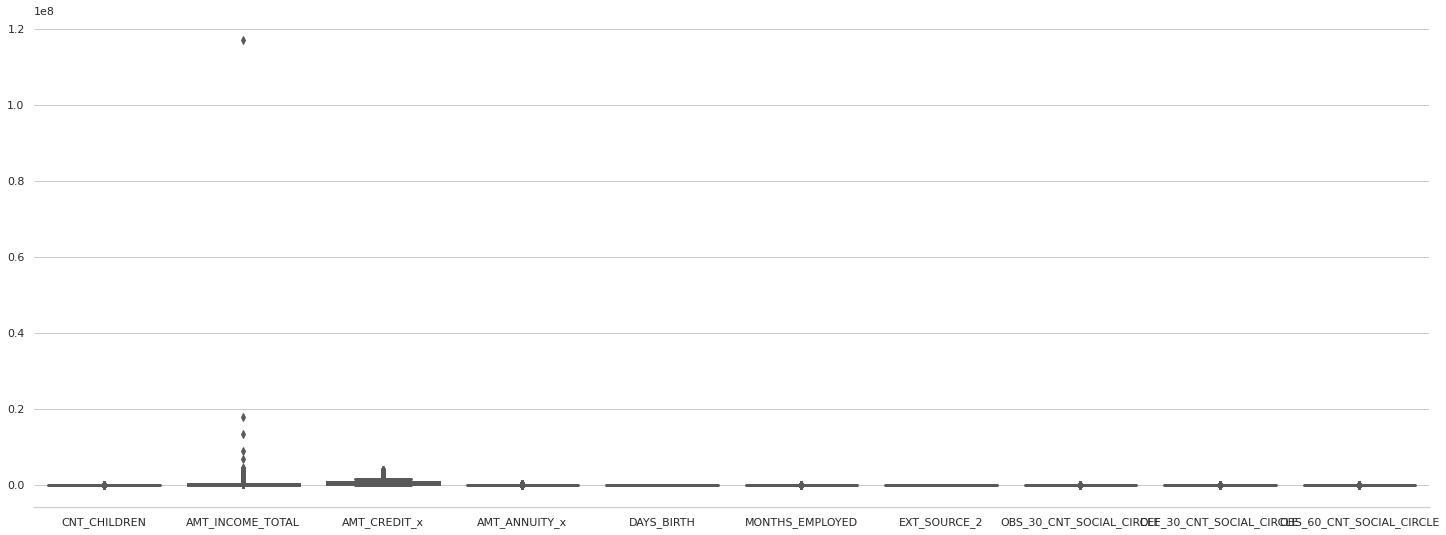

In [ ]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[0:10]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la variable AMT_INCOME_TOTAL se filtran los datos mayores a 630000 por percentil 99.5

In [ ]:
data=data[data['AMT_INCOME_TOTAL']<630000]

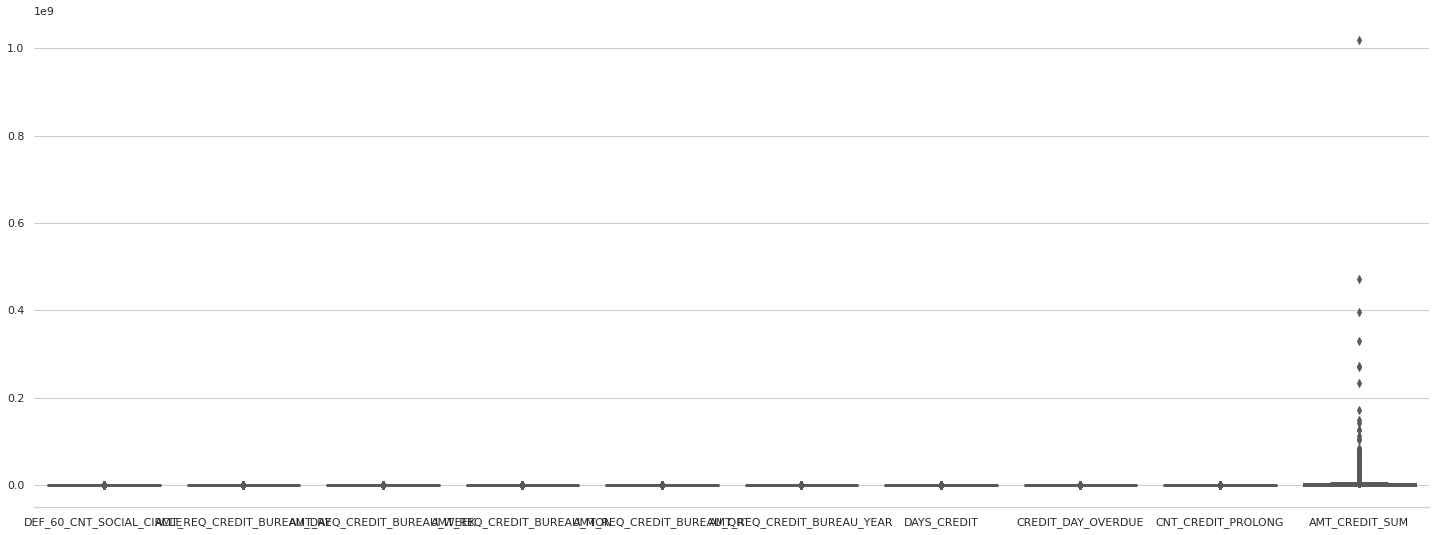

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[10:20]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, las variables AMT_CREDIT_SUM y AMT_CREDIT_SUM_DEBT se filtraran por los datos menores a 100000000

In [ ]:
data=data[data['AMT_CREDIT_SUM']<100000000]
data=data[data['AMT_CREDIT_SUM_DEBT']<100000000]

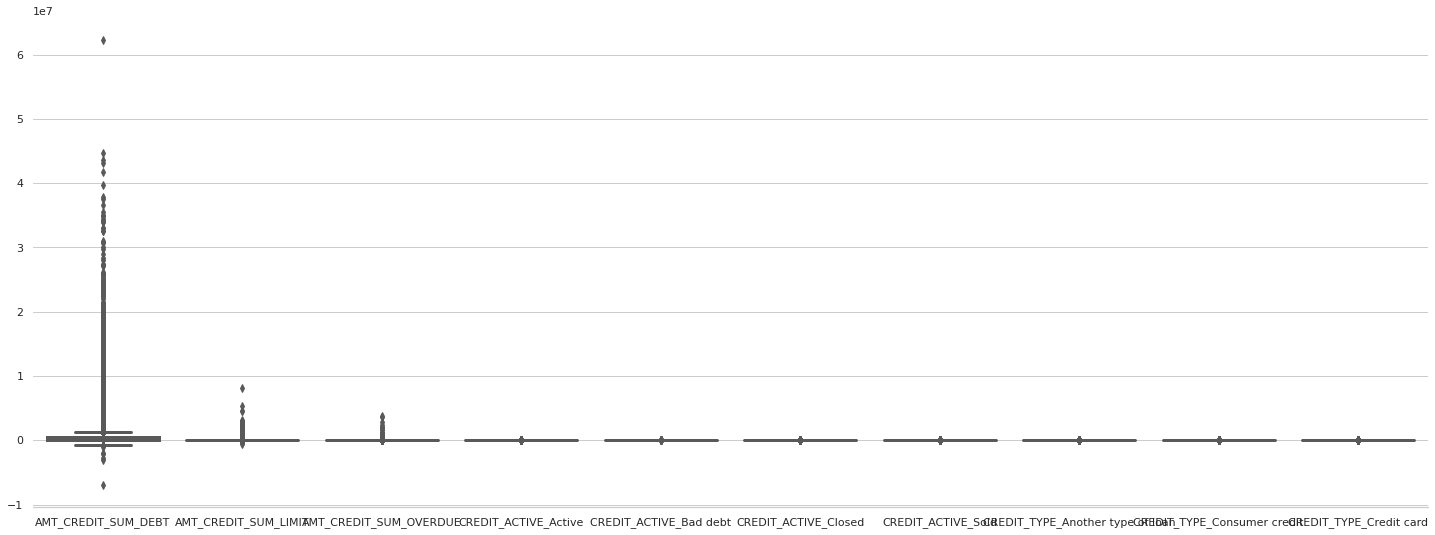

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[20:30]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, las variables AMT_CREDIT_SUM_LIMIT y AMT_CREDIT_SUM_OVERDUE se filtraran por los datos menores a 2500000 y 2250000 respectivamente

In [ ]:
data=data[data['AMT_CREDIT_SUM_LIMIT']<2500000]
data=data[data['AMT_CREDIT_SUM_OVERDUE']<2250000]

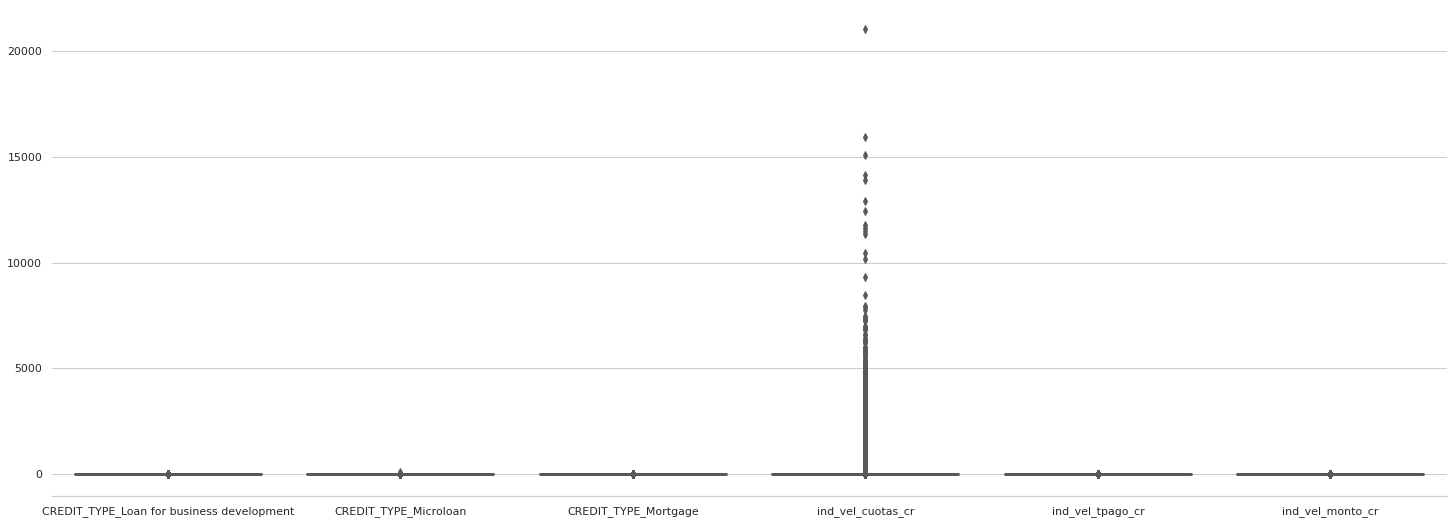

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data[Cuantitativas[30:]], 
            linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

De la gráfica anterior, la variable ind_vel_cuotas_cr se filtrara por los datos menores a 15000

In [ ]:
data=data[data['ind_vel_cuotas_cr']<15000]

In [ ]:
a=data_original.shape[0]
b=data.shape[0]
print(f'A partir del tratamiento de datos atipicos, se obtuvo una reducción de {round(100*((b-a)/a),2)}% en el número de muestras')

A partir del tratamiento de datos atipicos, se obtuvo una reducción de -1.52% en el número de muestras


## 4.5 Exploración y Análisis Bivariante

Es importante convertir las features categoricas representadas por numeros

In [ ]:
data["TARGET"]=data["TARGET"].astype('category')
data["SK_ID_CURR"]=data["SK_ID_CURR"].astype('category')
data["FLAG_OWN_REALTY"]=data["FLAG_OWN_REALTY"].astype('category')
data["REGION_RATING_CLIENT_W_CITY"]=data["REGION_RATING_CLIENT_W_CITY"].astype('category')
data["FLAG_OWN_CAR"]=data["FLAG_OWN_CAR"].astype('category')
data["NAME_INCOME_TYPE_Businessman"]=data["NAME_INCOME_TYPE_Businessman"].astype('category')
data["NAME_INCOME_TYPE_Commercial associate"]=data["NAME_INCOME_TYPE_Commercial associate"].astype('category')
data["NAME_INCOME_TYPE_Maternity leave"]=data["NAME_INCOME_TYPE_Maternity leave"].astype('category')
data["NAME_INCOME_TYPE_Pensioner"]=data["NAME_INCOME_TYPE_Pensioner"].astype('category')
data["NAME_INCOME_TYPE_State servant"]=data["NAME_INCOME_TYPE_State servant"].astype('category')
data["NAME_INCOME_TYPE_Student"]=data["NAME_INCOME_TYPE_Student"].astype('category')
data["NAME_INCOME_TYPE_Unemployed"]=data["NAME_INCOME_TYPE_Unemployed"].astype('category')
data["NAME_INCOME_TYPE_Working"]=data["NAME_INCOME_TYPE_Working"].astype('category')
data["NAME_EDUCATION_TYPE_Academic degree"]=data["NAME_EDUCATION_TYPE_Academic degree"].astype('category')
data["NAME_EDUCATION_TYPE_Higher education"]=data["NAME_EDUCATION_TYPE_Higher education"].astype('category')
data["NAME_EDUCATION_TYPE_Incomplete higher"]=data["NAME_EDUCATION_TYPE_Incomplete higher"].astype('category')
data["NAME_EDUCATION_TYPE_Lower secondary"]=data["NAME_EDUCATION_TYPE_Lower secondary"].astype('category')
data["NAME_EDUCATION_TYPE_Secondary / secondary special"]=data["NAME_EDUCATION_TYPE_Secondary / secondary special"].astype('category')
data["NAME_HOUSING_TYPE_Co-op apartment"]=data["NAME_HOUSING_TYPE_Co-op apartment"].astype('category')
data["NAME_HOUSING_TYPE_House / apartment"]=data["NAME_HOUSING_TYPE_House / apartment"].astype('category')
data["NAME_HOUSING_TYPE_Municipal apartment"]=data["NAME_HOUSING_TYPE_Municipal apartment"].astype('category')
data["NAME_HOUSING_TYPE_Office apartment"]=data["NAME_HOUSING_TYPE_Office apartment"].astype('category')
data["NAME_HOUSING_TYPE_Rented apartment"]=data["NAME_HOUSING_TYPE_Rented apartment"].astype('category')
data["NAME_HOUSING_TYPE_With parents"]=data["NAME_HOUSING_TYPE_With parents"].astype('category')
data["OCCUPATION_TYPE_Accountants"]=data["OCCUPATION_TYPE_Accountants"].astype('category')
data["OCCUPATION_TYPE_Cleaning staff"]=data["OCCUPATION_TYPE_Cleaning staff"].astype('category')
data["OCCUPATION_TYPE_Cooking staff"]=data["OCCUPATION_TYPE_Cooking staff"].astype('category')
data["OCCUPATION_TYPE_Core staff"]=data["OCCUPATION_TYPE_Core staff"].astype('category')
data["OCCUPATION_TYPE_Drivers"]=data["OCCUPATION_TYPE_Drivers"].astype('category')
data["OCCUPATION_TYPE_HR staff"]=data["OCCUPATION_TYPE_HR staff"].astype('category')
data["OCCUPATION_TYPE_High skill tech staff"]=data["OCCUPATION_TYPE_High skill tech staff"].astype('category')
data["OCCUPATION_TYPE_IT staff"]=data["OCCUPATION_TYPE_IT staff"].astype('category')
data["OCCUPATION_TYPE_Laborers"]=data["OCCUPATION_TYPE_Laborers"].astype('category')
data["OCCUPATION_TYPE_Low-skill Laborers"]=data["OCCUPATION_TYPE_Low-skill Laborers"].astype('category')
data["OCCUPATION_TYPE_Managers"]=data["OCCUPATION_TYPE_Managers"].astype('category')
data["OCCUPATION_TYPE_Medicine staff"]=data["OCCUPATION_TYPE_Medicine staff"].astype('category')
data["OCCUPATION_TYPE_Private service staff"]=data["OCCUPATION_TYPE_Private service staff"].astype('category')
data["OCCUPATION_TYPE_Realty agents"]=data["OCCUPATION_TYPE_Realty agents"].astype('category')
data["OCCUPATION_TYPE_Sales staff"]=data["OCCUPATION_TYPE_Sales staff"].astype('category')
data["OCCUPATION_TYPE_Secretaries"]=data["OCCUPATION_TYPE_Secretaries"].astype('category')
data["OCCUPATION_TYPE_Security staff"]=data["OCCUPATION_TYPE_Security staff"].astype('category')
data["OCCUPATION_TYPE_Waiters/barmen staff"]=data["OCCUPATION_TYPE_Waiters/barmen staff"].astype('category')
data["FONDKAPREMONT_MODE_not specified"]=data["FONDKAPREMONT_MODE_not specified"].astype('category')
data["FONDKAPREMONT_MODE_org spec account"]=data["FONDKAPREMONT_MODE_org spec account"].astype('category')
data["FONDKAPREMONT_MODE_reg oper account"]=data["FONDKAPREMONT_MODE_reg oper account"].astype('category')
data["FONDKAPREMONT_MODE_reg oper spec account"]=data["FONDKAPREMONT_MODE_reg oper spec account"].astype('category')
data["HOUSETYPE_MODE_block of flats"]=data["HOUSETYPE_MODE_block of flats"].astype('category')
data["HOUSETYPE_MODE_specific housing"]=data["HOUSETYPE_MODE_specific housing"].astype('category')
data["HOUSETYPE_MODE_terraced house"]=data["HOUSETYPE_MODE_terraced house"].astype('category')
data["WALLSMATERIAL_MODE_Block"]=data["WALLSMATERIAL_MODE_Block"].astype('category')
data["WALLSMATERIAL_MODE_Mixed"]=data["WALLSMATERIAL_MODE_Mixed"].astype('category')
data["WALLSMATERIAL_MODE_Monolithic"]=data["WALLSMATERIAL_MODE_Monolithic"].astype('category')
data["WALLSMATERIAL_MODE_Others"]=data["WALLSMATERIAL_MODE_Others"].astype('category')
data["WALLSMATERIAL_MODE_Panel"]=data["WALLSMATERIAL_MODE_Panel"].astype('category')
data["WALLSMATERIAL_MODE_Stone, brick"]=data["WALLSMATERIAL_MODE_Stone, brick"].astype('category')
data["WALLSMATERIAL_MODE_Wooden"]=data["WALLSMATERIAL_MODE_Wooden"].astype('category')
# data.columns.is_object

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)

### 4.5.1 Categóricas

Participación de la categorías de FLAG_OWN_CAR son: 
 FLAG_OWN_CAR
0    66.127237
1    33.872763
Name: SK_ID_CURR, dtype: float64 



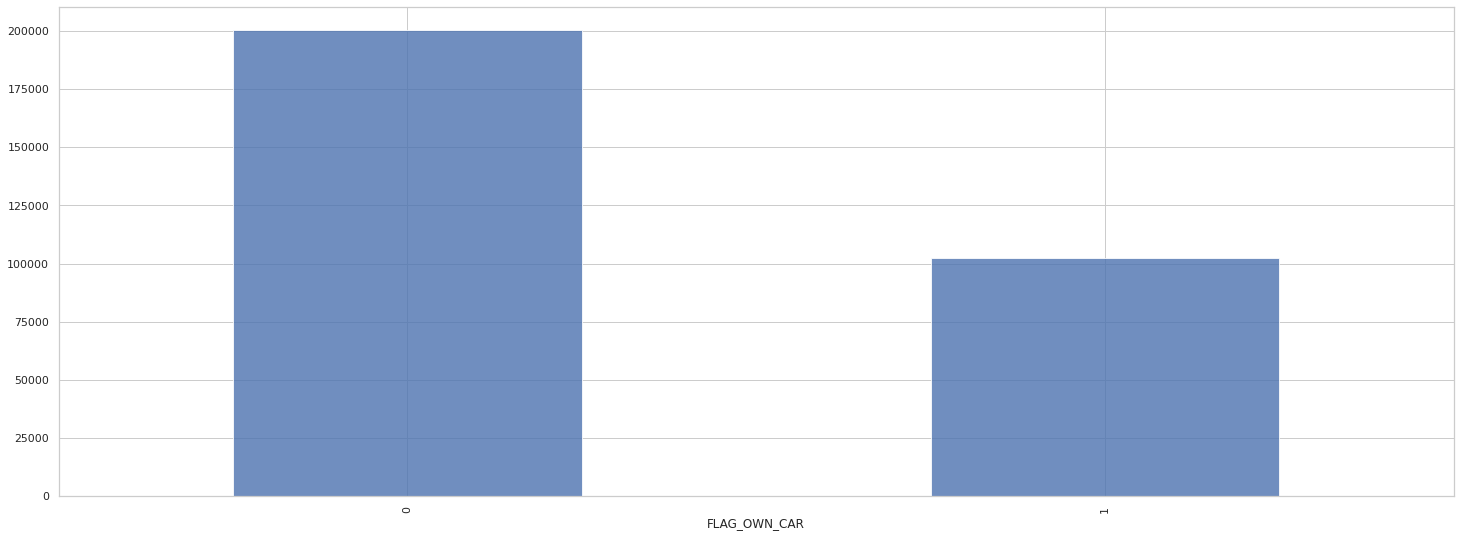

Participación de la categorías de FLAG_OWN_REALTY son: 
 FLAG_OWN_REALTY
0    30.58963
1    69.41037
Name: SK_ID_CURR, dtype: float64 



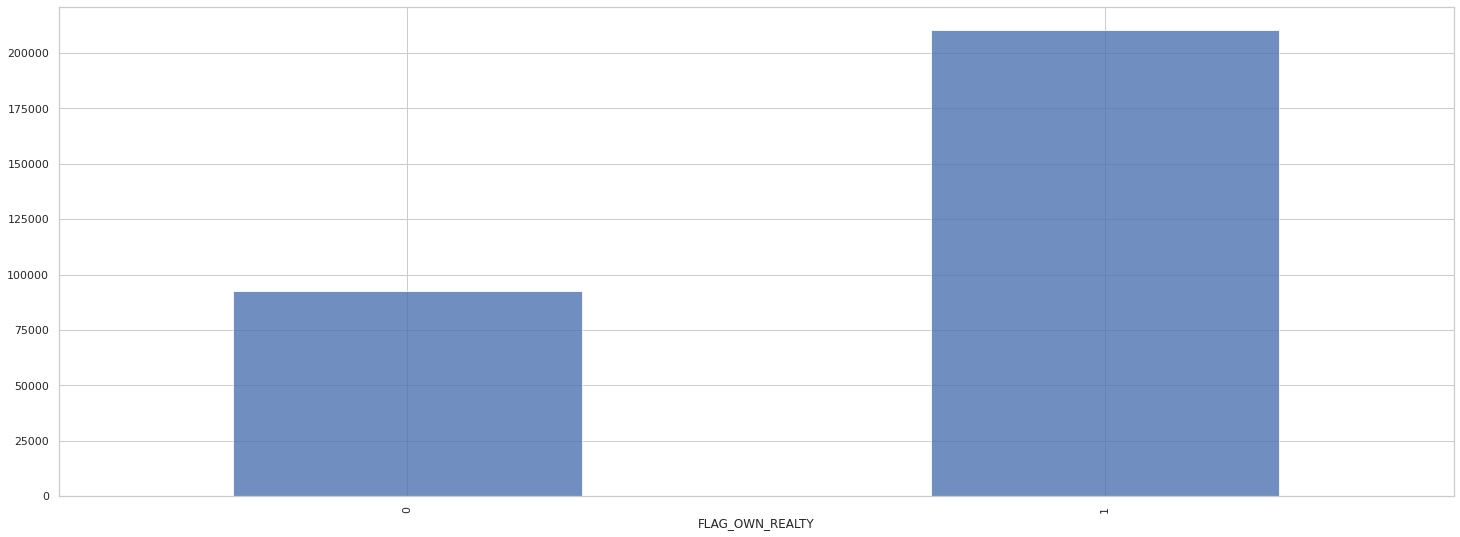

Participación de la categorías de REGION_RATING_CLIENT_W_CITY son: 
 REGION_RATING_CLIENT_W_CITY
1    10.922863
2    74.753922
3    14.323215
Name: SK_ID_CURR, dtype: float64 



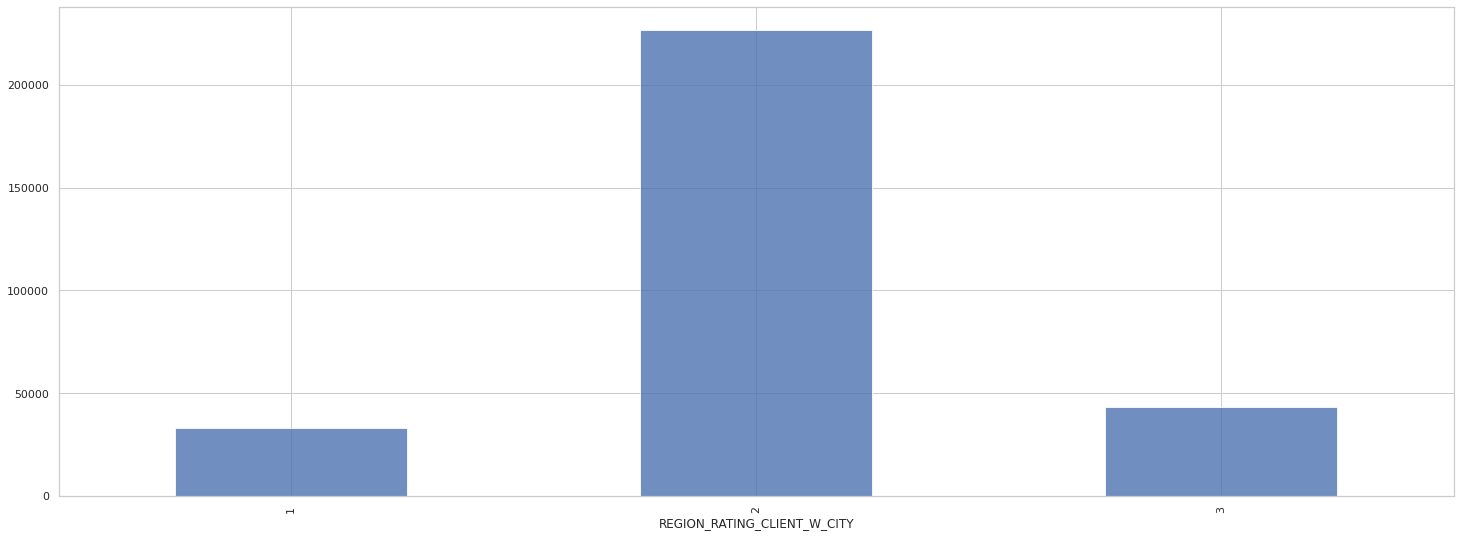

Participación de la categorías de NAME_INCOME_TYPE_Businessman son: 
 NAME_INCOME_TYPE_Businessman
0    99.998019
1     0.001981
Name: SK_ID_CURR, dtype: float64 



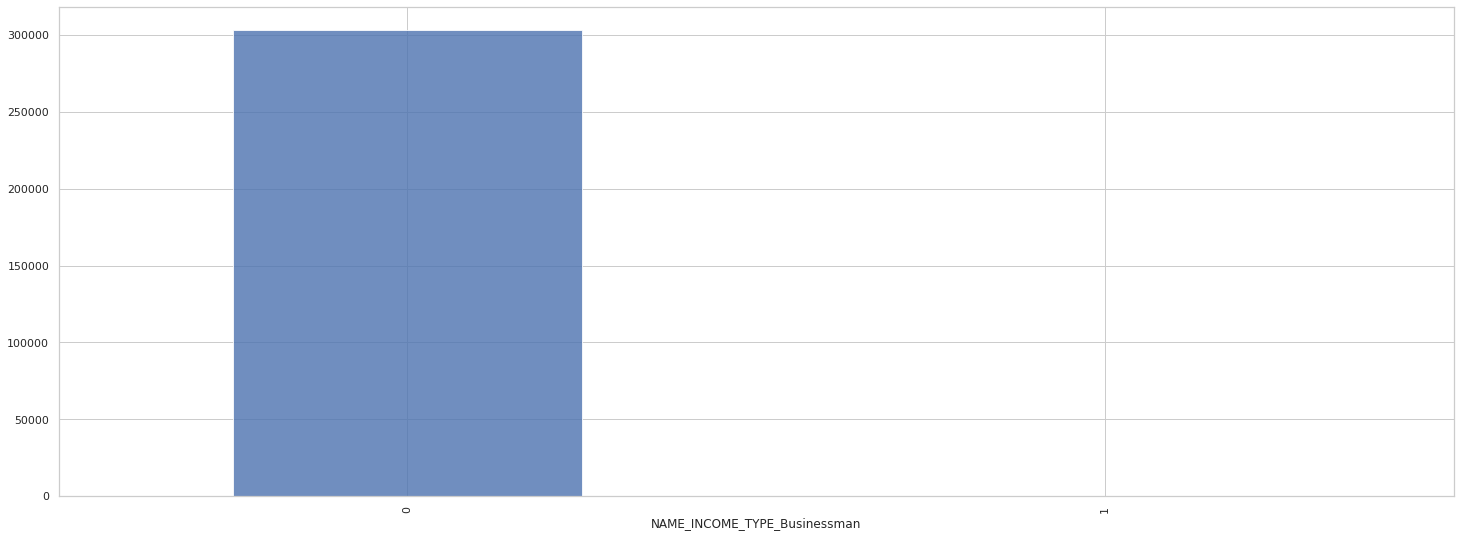

Participación de la categorías de NAME_INCOME_TYPE_Commercial associate son: 
 NAME_INCOME_TYPE_Commercial associate
0    76.895899
1    23.104101
Name: SK_ID_CURR, dtype: float64 



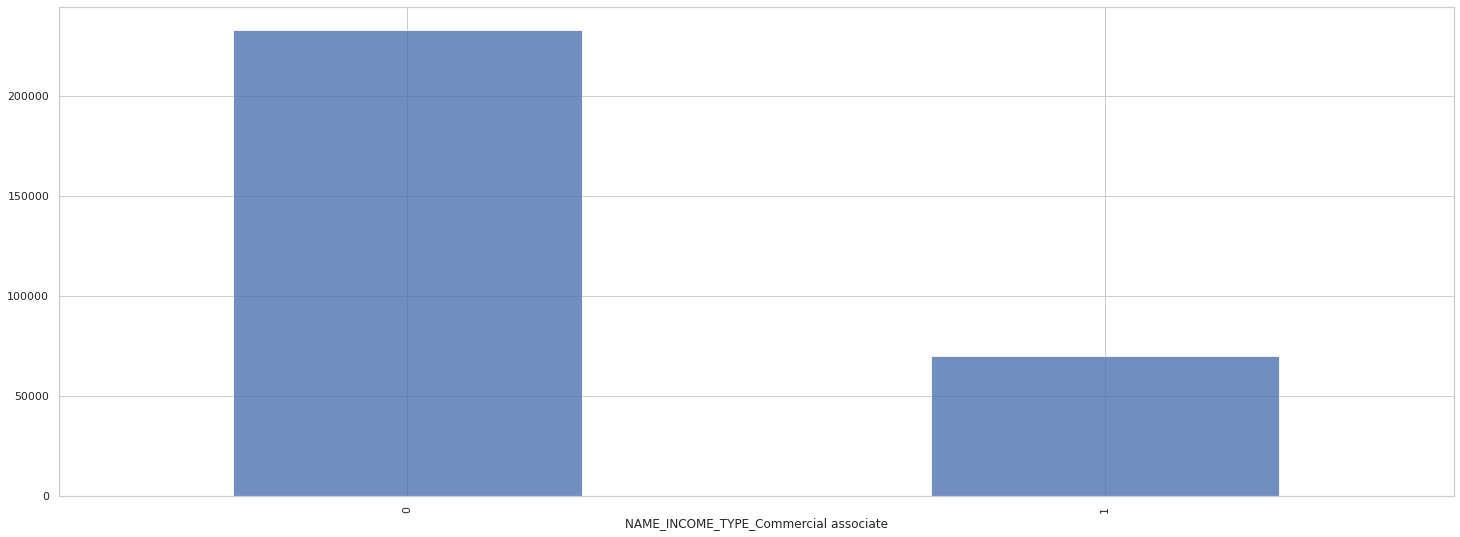

Participación de la categorías de NAME_INCOME_TYPE_Maternity leave son: 
 NAME_INCOME_TYPE_Maternity leave
0    99.998679
1     0.001321
Name: SK_ID_CURR, dtype: float64 



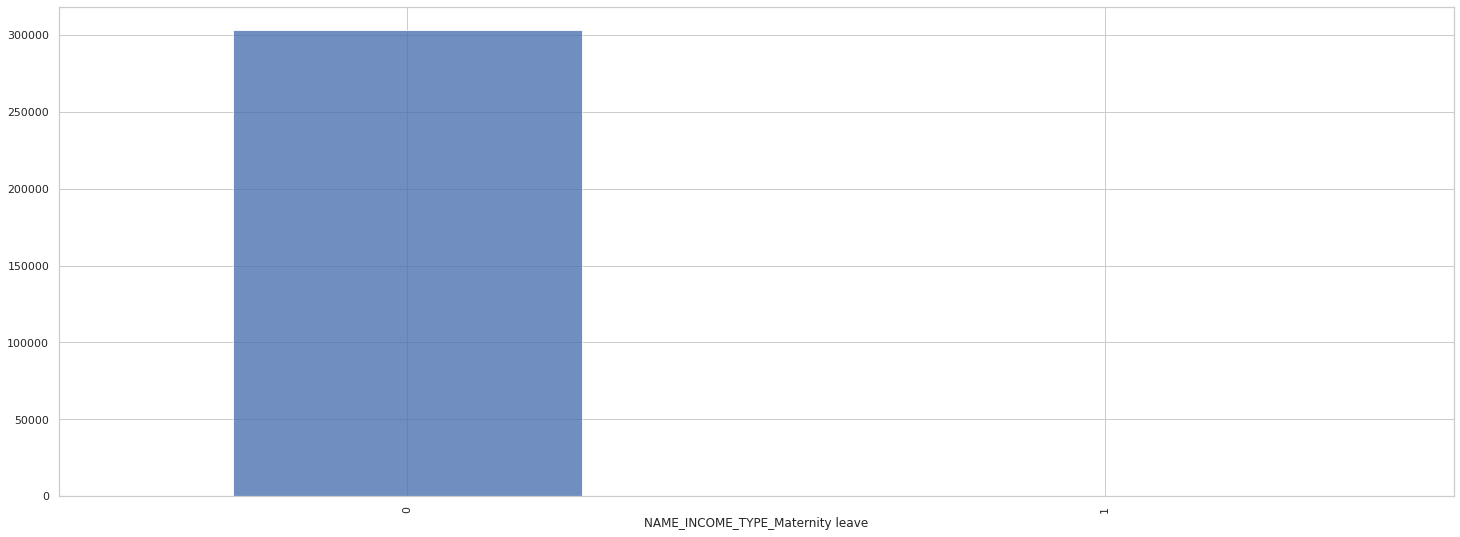

Participación de la categorías de NAME_INCOME_TYPE_Pensioner son: 
 NAME_INCOME_TYPE_Pensioner
0    81.922464
1    18.077536
Name: SK_ID_CURR, dtype: float64 



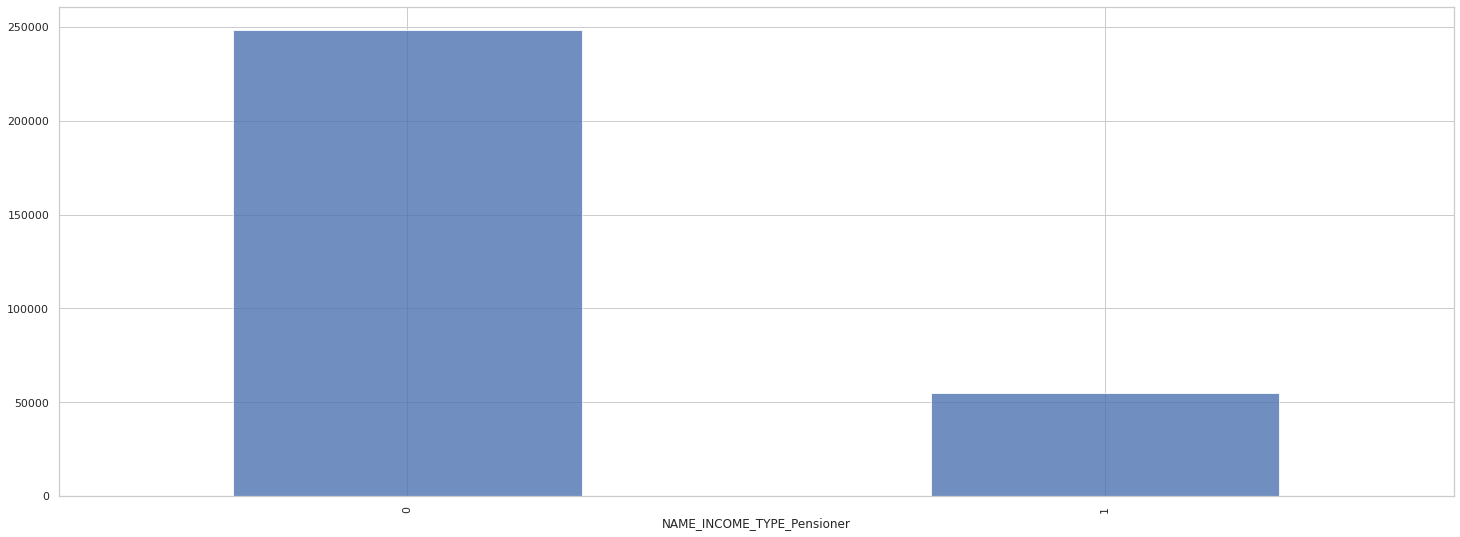

Participación de la categorías de NAME_INCOME_TYPE_State servant son: 
 NAME_INCOME_TYPE_State servant
0    92.93481
1     7.06519
Name: SK_ID_CURR, dtype: float64 



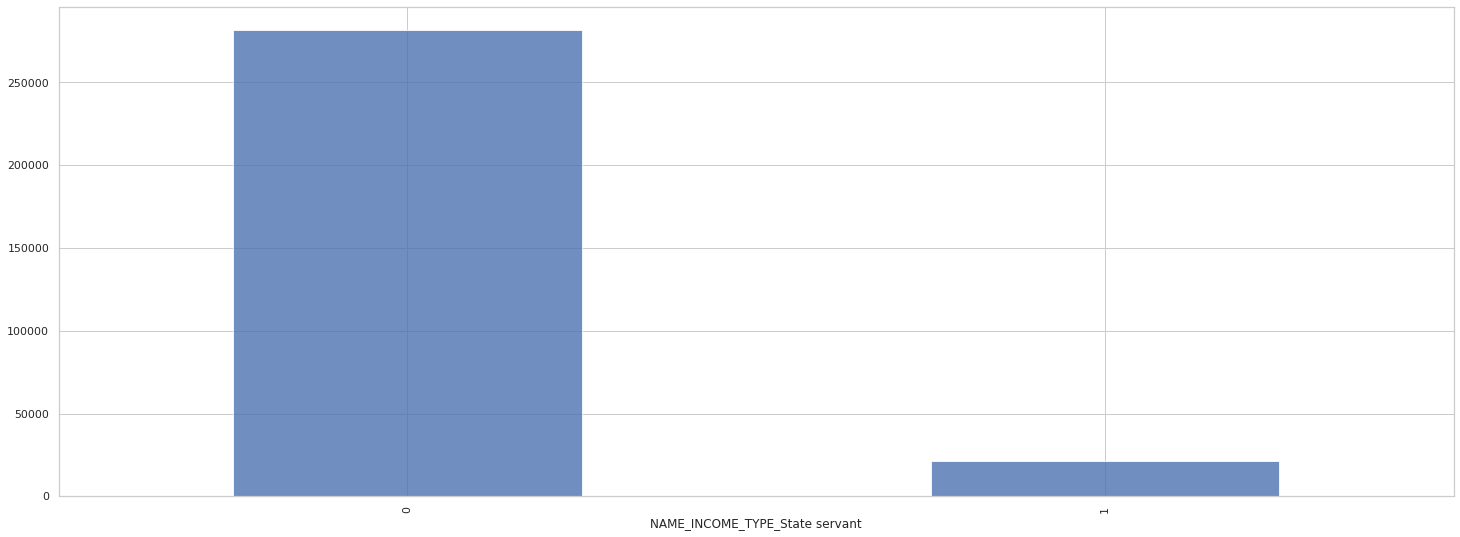

Participación de la categorías de NAME_INCOME_TYPE_Student son: 
 NAME_INCOME_TYPE_Student
0    99.994056
1     0.005944
Name: SK_ID_CURR, dtype: float64 



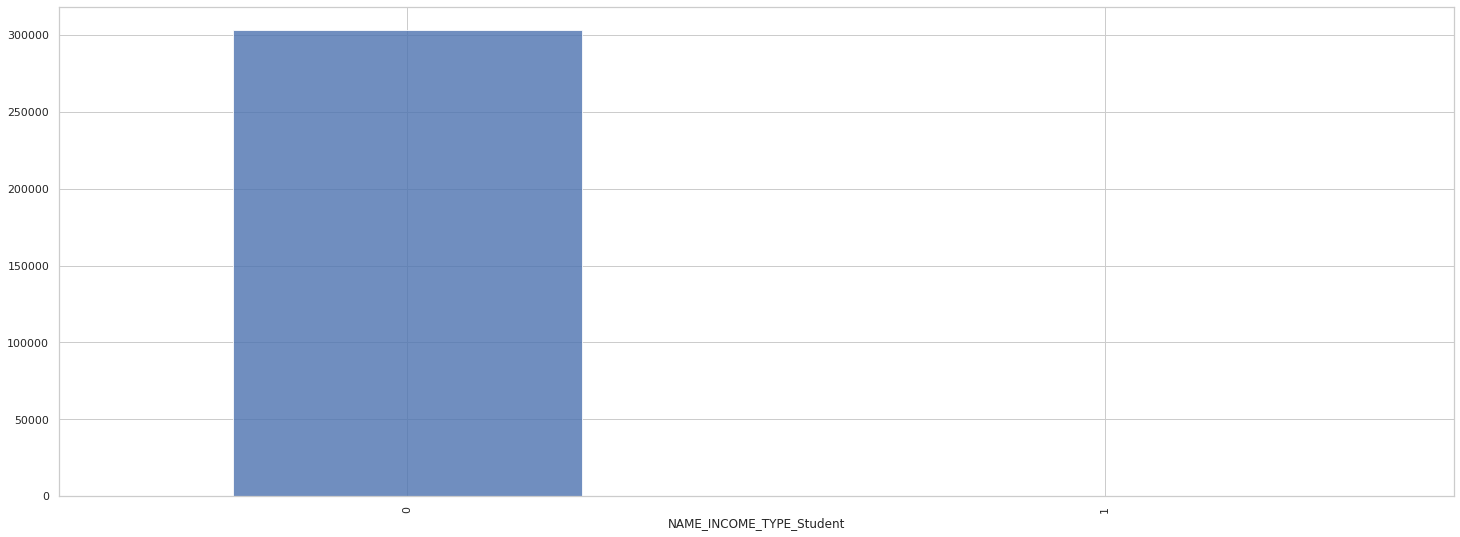

Participación de la categorías de NAME_INCOME_TYPE_Unemployed son: 
 NAME_INCOME_TYPE_Unemployed
0    99.994056
1     0.005944
Name: SK_ID_CURR, dtype: float64 



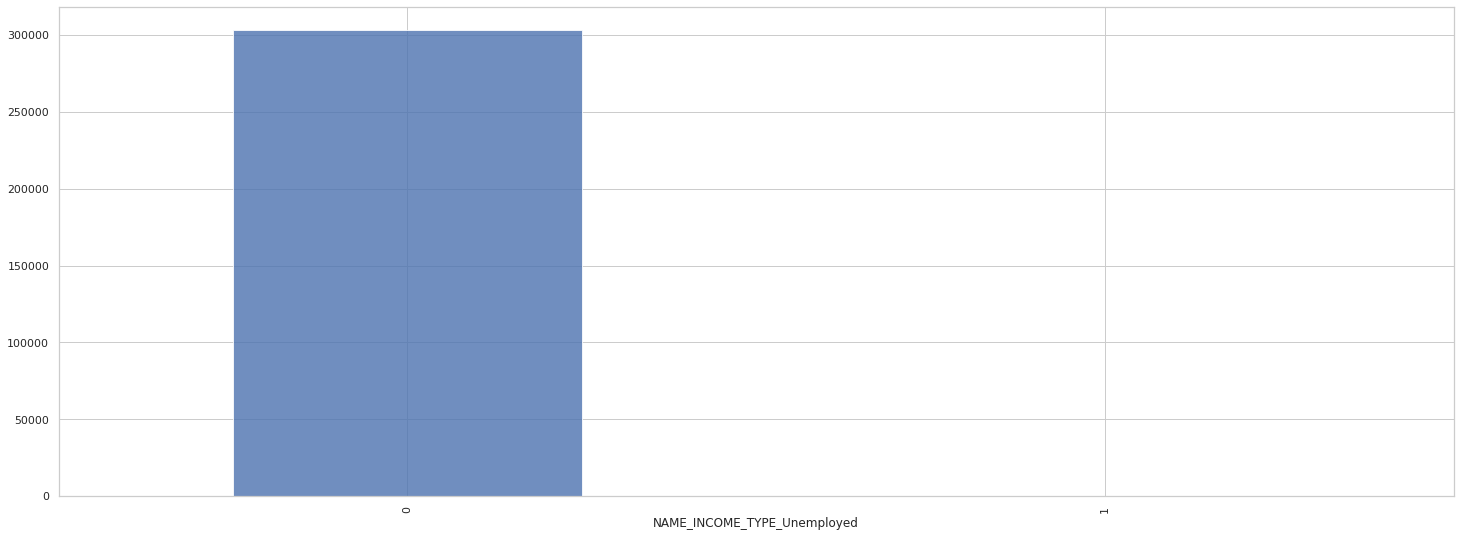

Participación de la categorías de NAME_INCOME_TYPE_Working son: 
 NAME_INCOME_TYPE_Working
0    48.262017
1    51.737983
Name: SK_ID_CURR, dtype: float64 



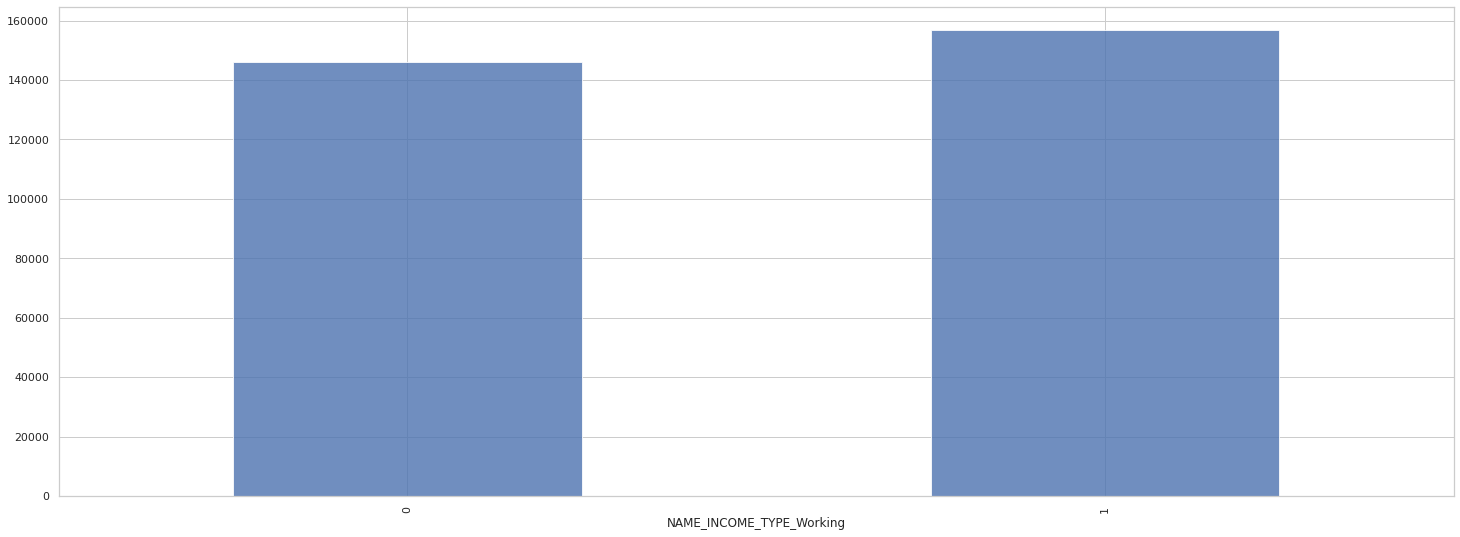

Participación de la categorías de NAME_EDUCATION_TYPE_Academic degree son: 
 NAME_EDUCATION_TYPE_Academic degree
0    99.94849
1     0.05151
Name: SK_ID_CURR, dtype: float64 



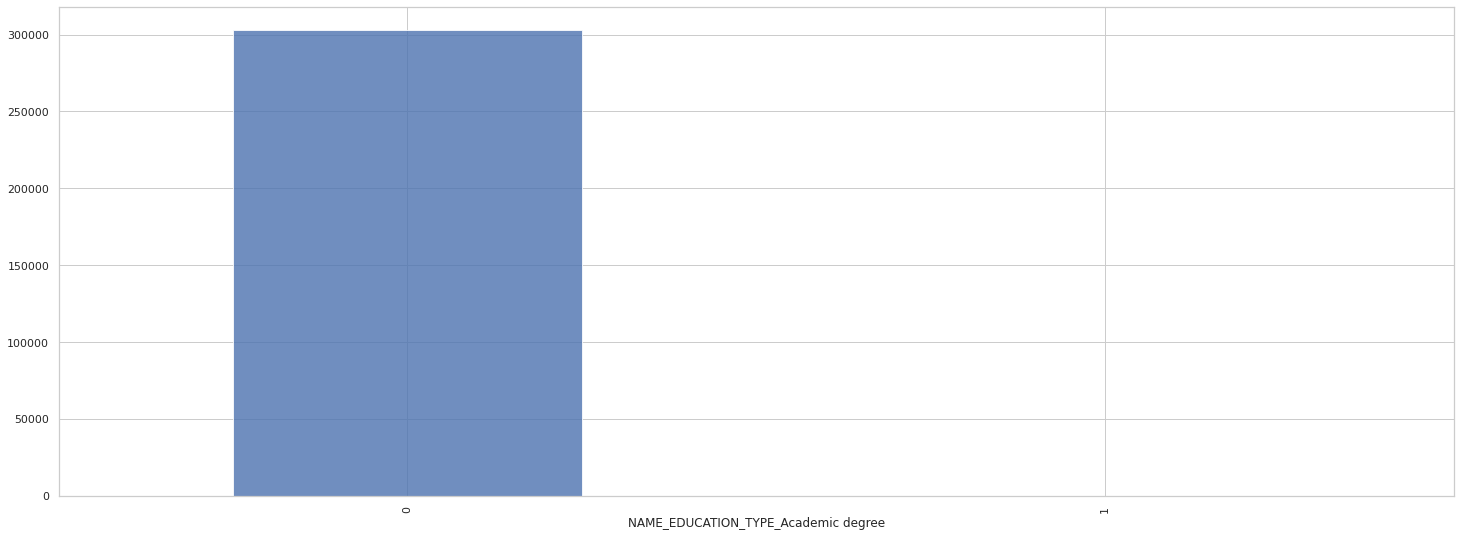

Participación de la categorías de NAME_EDUCATION_TYPE_Higher education son: 
 NAME_EDUCATION_TYPE_Higher education
0    75.880218
1    24.119782
Name: SK_ID_CURR, dtype: float64 



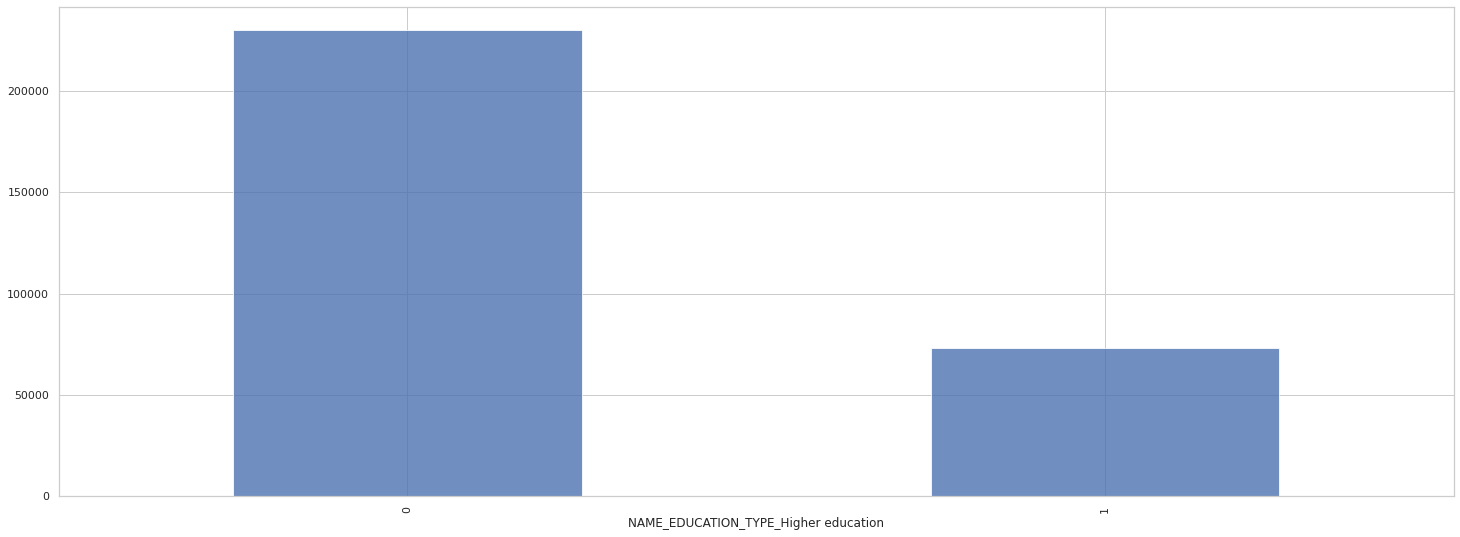

Participación de la categorías de NAME_EDUCATION_TYPE_Incomplete higher son: 
 NAME_EDUCATION_TYPE_Incomplete higher
0    96.671961
1     3.328039
Name: SK_ID_CURR, dtype: float64 



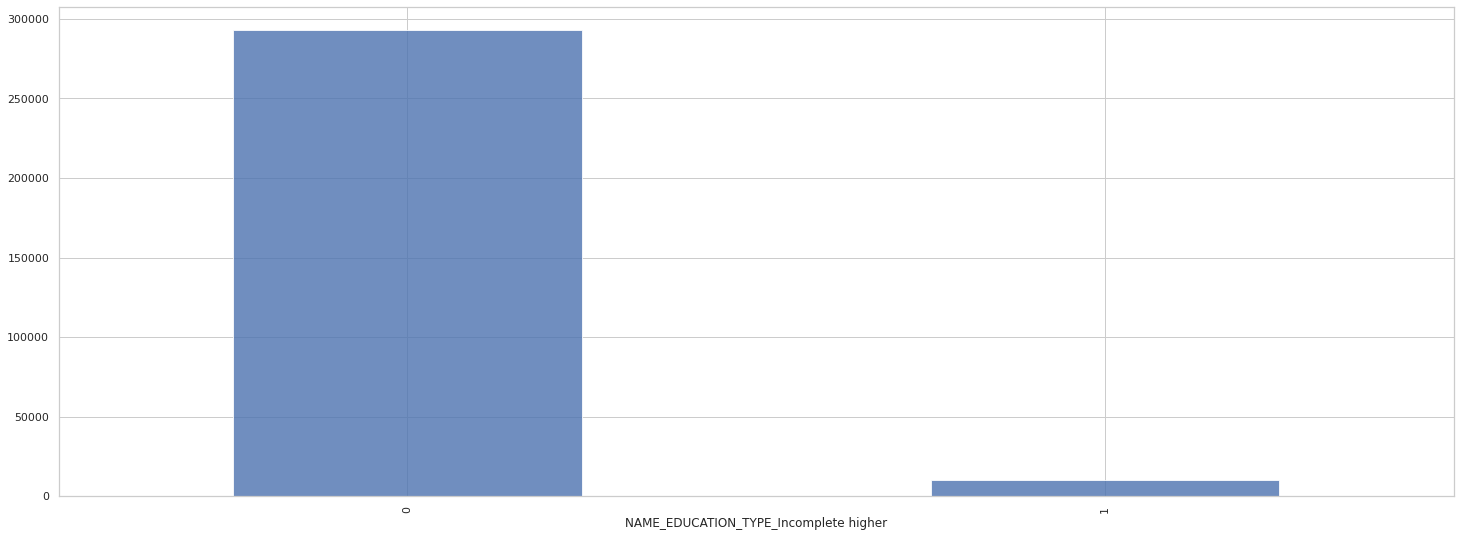

Participación de la categorías de NAME_EDUCATION_TYPE_Lower secondary son: 
 NAME_EDUCATION_TYPE_Lower secondary
0    98.758135
1     1.241865
Name: SK_ID_CURR, dtype: float64 



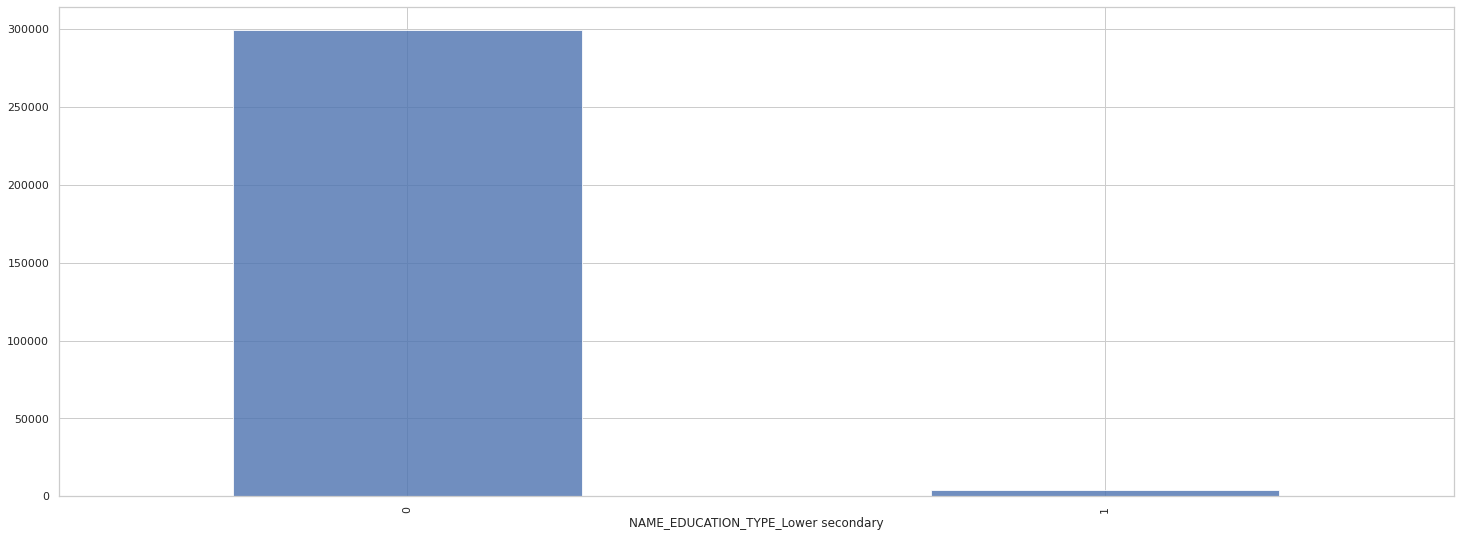

Participación de la categorías de NAME_EDUCATION_TYPE_Secondary / secondary special son: 
 NAME_EDUCATION_TYPE_Secondary / secondary special
0    28.741196
1    71.258804
Name: SK_ID_CURR, dtype: float64 



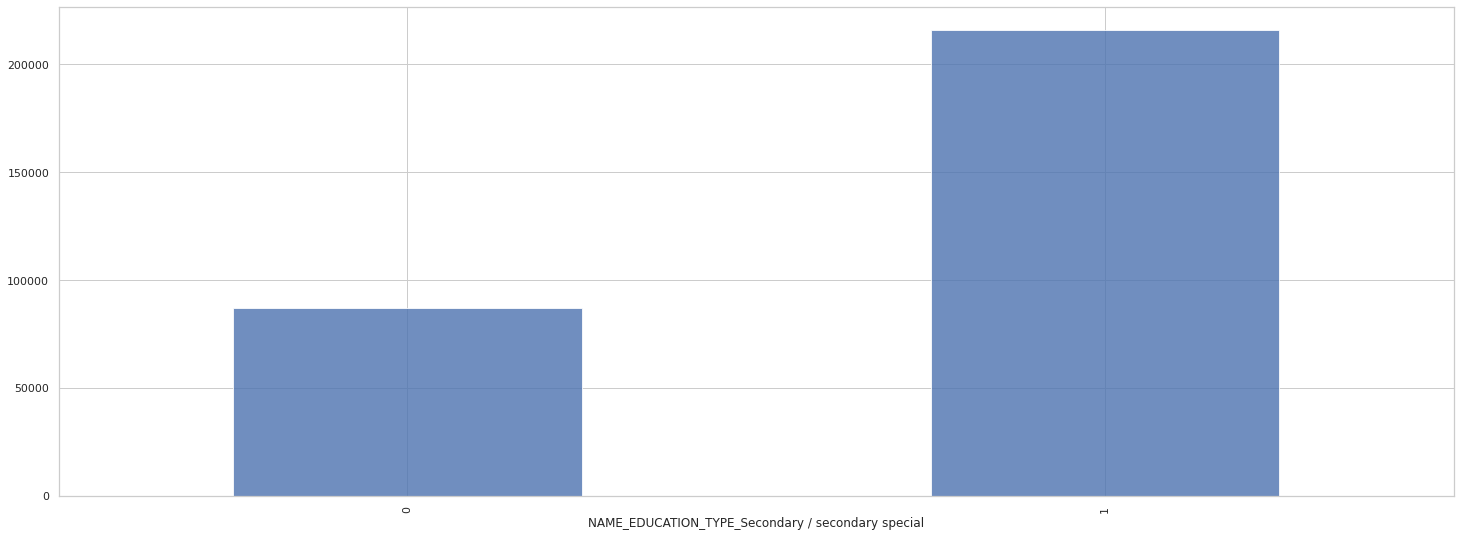

Participación de la categorías de NAME_HOUSING_TYPE_Co-op apartment son: 
 NAME_HOUSING_TYPE_Co-op apartment
0    99.634474
1     0.365526
Name: SK_ID_CURR, dtype: float64 



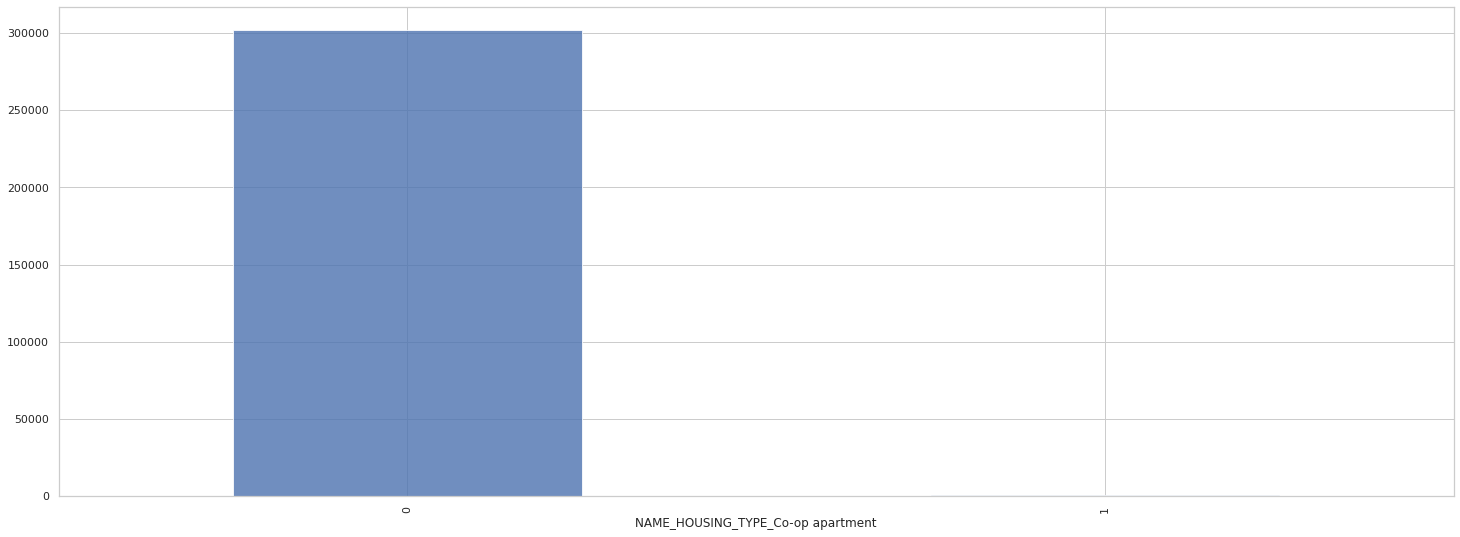

Participación de la categorías de NAME_HOUSING_TYPE_House / apartment son: 
 NAME_HOUSING_TYPE_House / apartment
0    11.261974
1    88.738026
Name: SK_ID_CURR, dtype: float64 



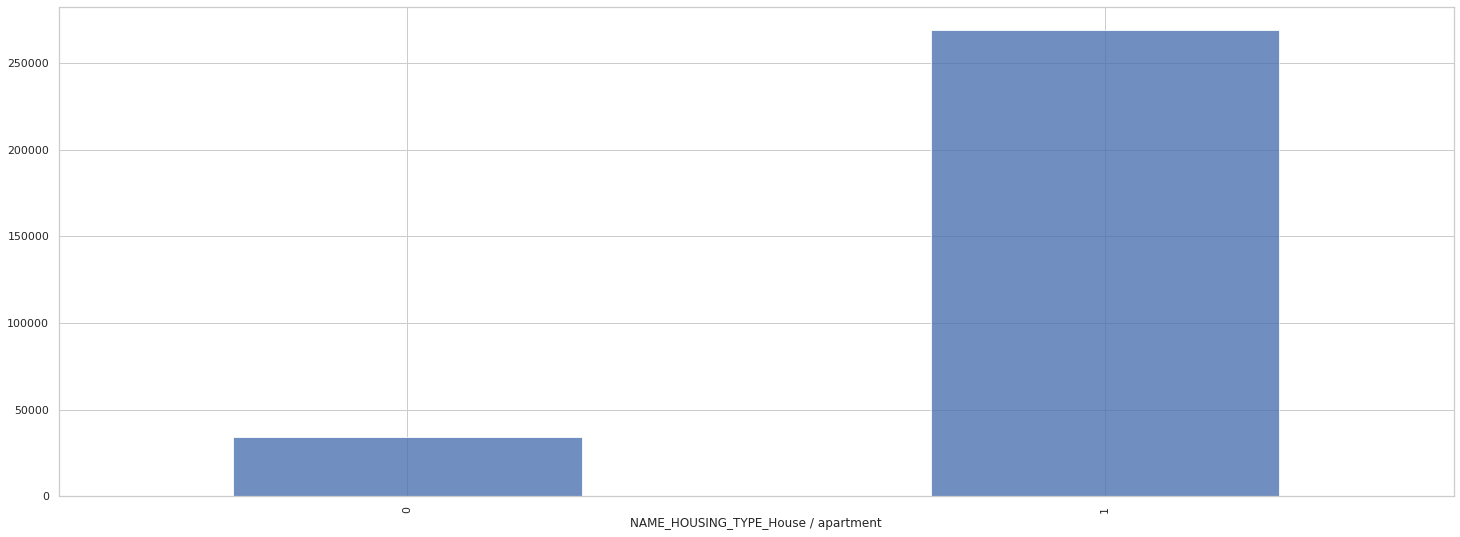

Participación de la categorías de NAME_HOUSING_TYPE_Municipal apartment son: 
 NAME_HOUSING_TYPE_Municipal apartment
0    96.353322
1     3.646678
Name: SK_ID_CURR, dtype: float64 



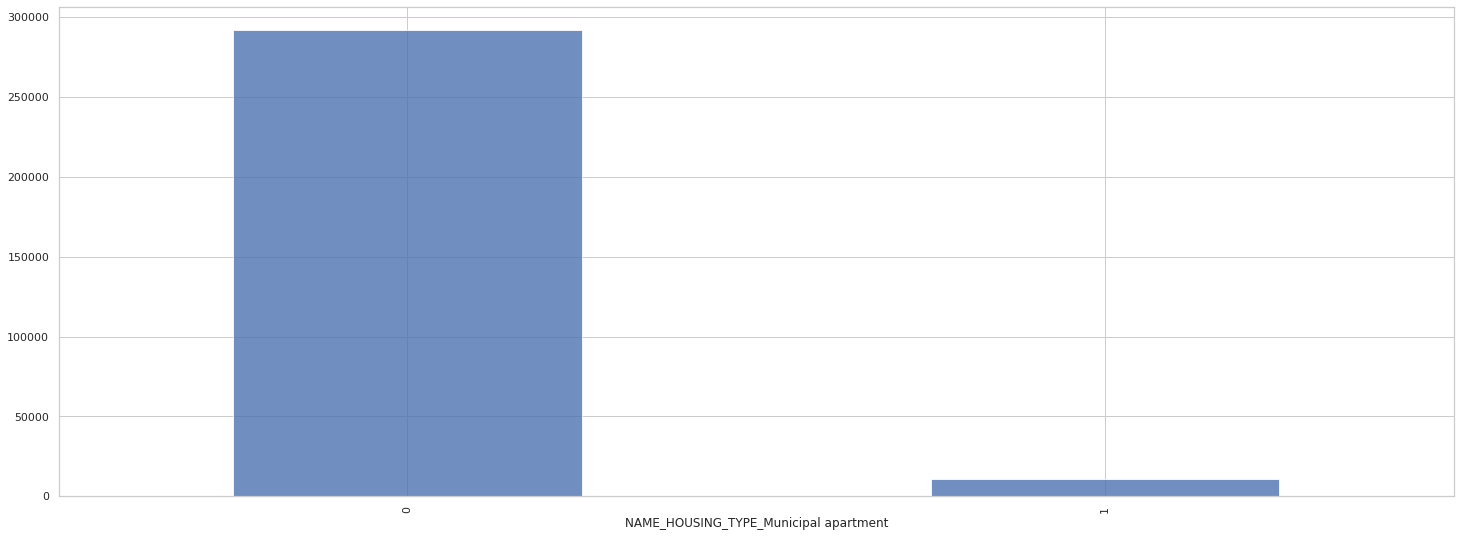

Participación de la categorías de NAME_HOUSING_TYPE_Office apartment son: 
 NAME_HOUSING_TYPE_Office apartment
0    99.153379
1     0.846621
Name: SK_ID_CURR, dtype: float64 



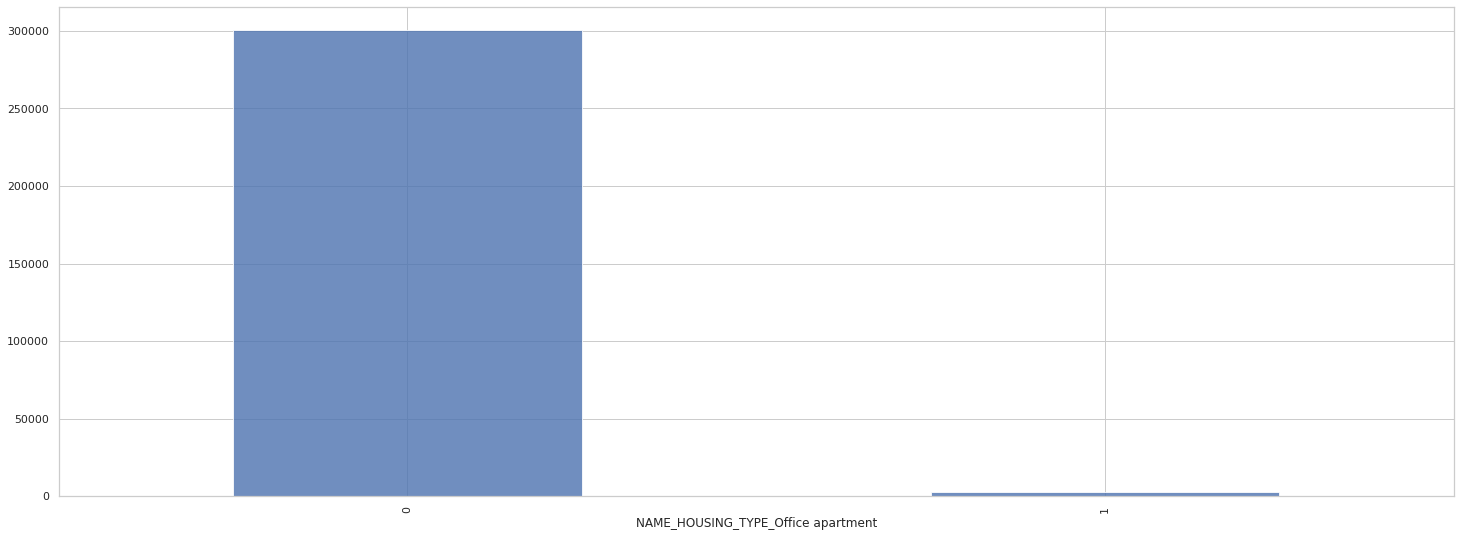

Participación de la categorías de NAME_HOUSING_TYPE_Rented apartment son: 
 NAME_HOUSING_TYPE_Rented apartment
0    98.422326
1     1.577674
Name: SK_ID_CURR, dtype: float64 



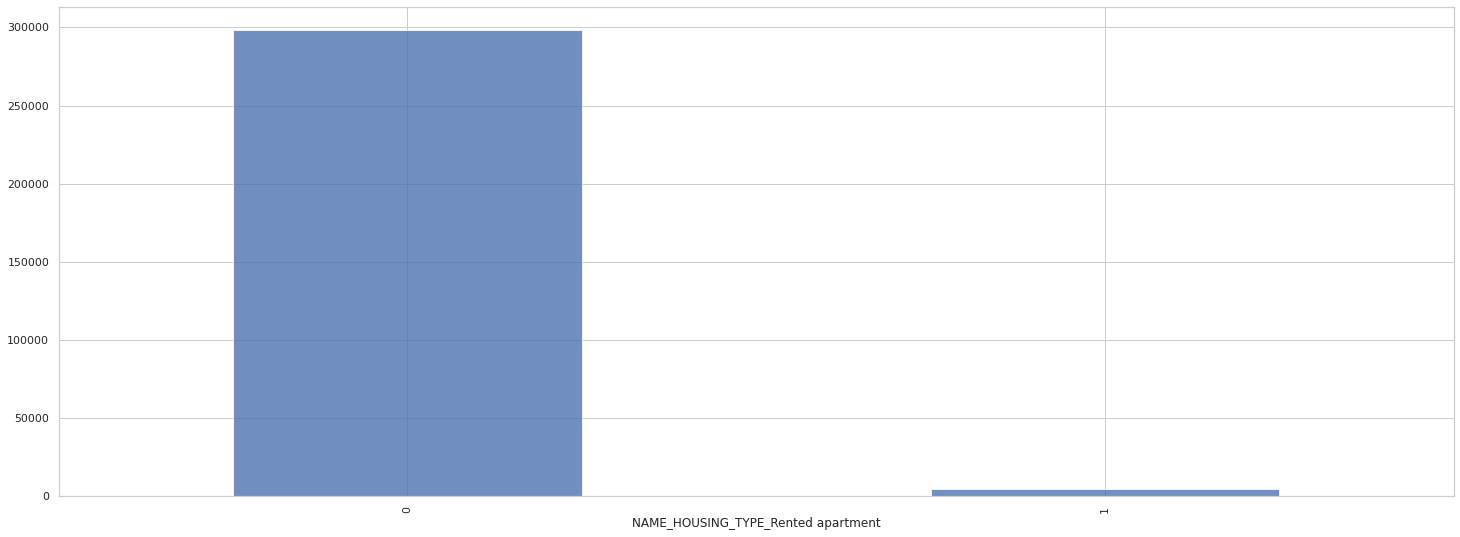

Participación de la categorías de NAME_HOUSING_TYPE_With parents son: 
 NAME_HOUSING_TYPE_With parents
0    95.174525
1     4.825475
Name: SK_ID_CURR, dtype: float64 



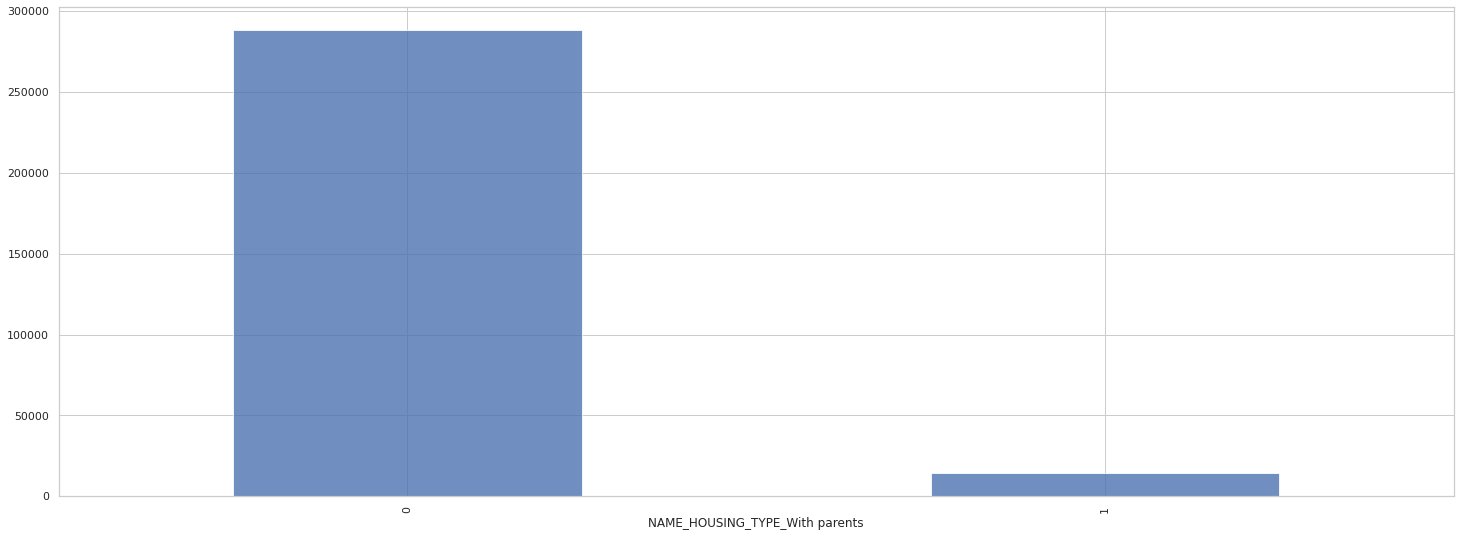

Participación de la categorías de OCCUPATION_TYPE_Accountants son: 
 OCCUPATION_TYPE_Accountants
0    96.818568
1     3.181432
Name: SK_ID_CURR, dtype: float64 



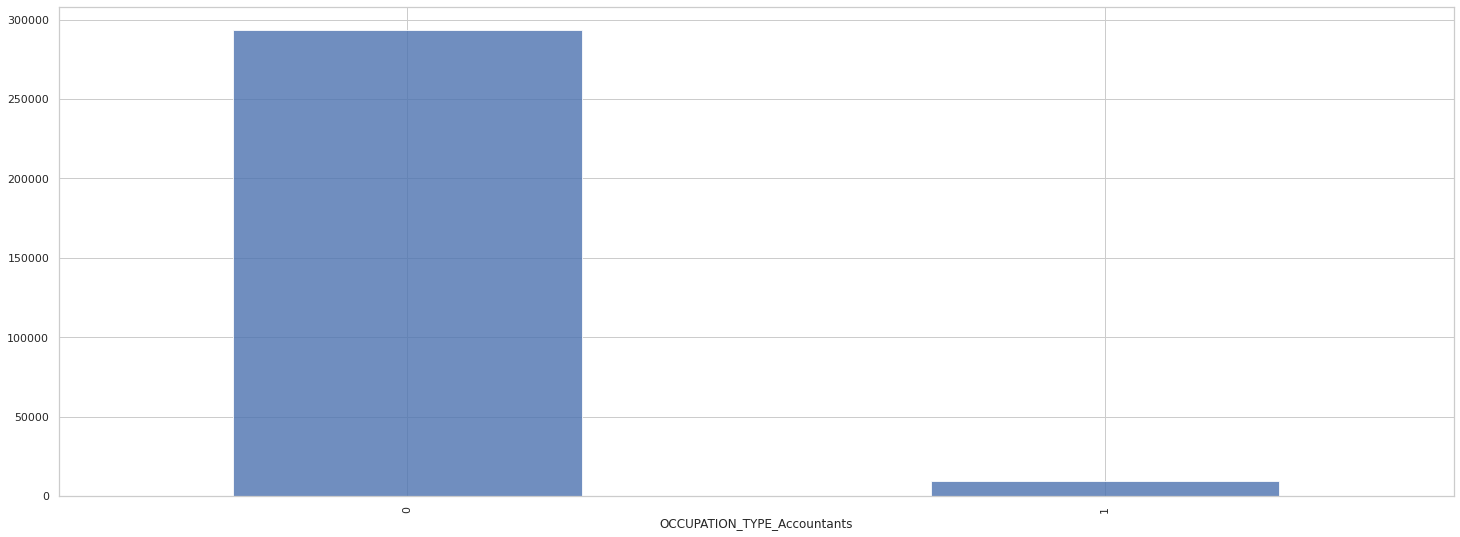

Participación de la categorías de OCCUPATION_TYPE_Cleaning staff son: 
 OCCUPATION_TYPE_Cleaning staff
0    98.47813
1     1.52187
Name: SK_ID_CURR, dtype: float64 



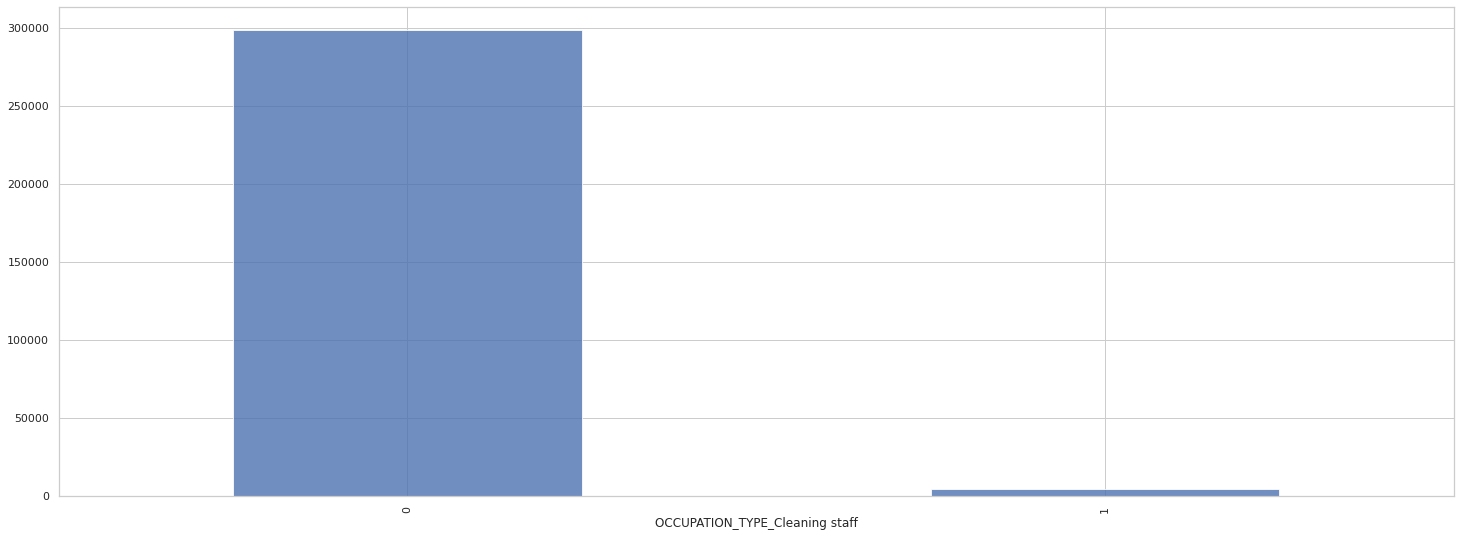

Participación de la categorías de OCCUPATION_TYPE_Cooking staff son: 
 OCCUPATION_TYPE_Cooking staff
0    98.058781
1     1.941219
Name: SK_ID_CURR, dtype: float64 



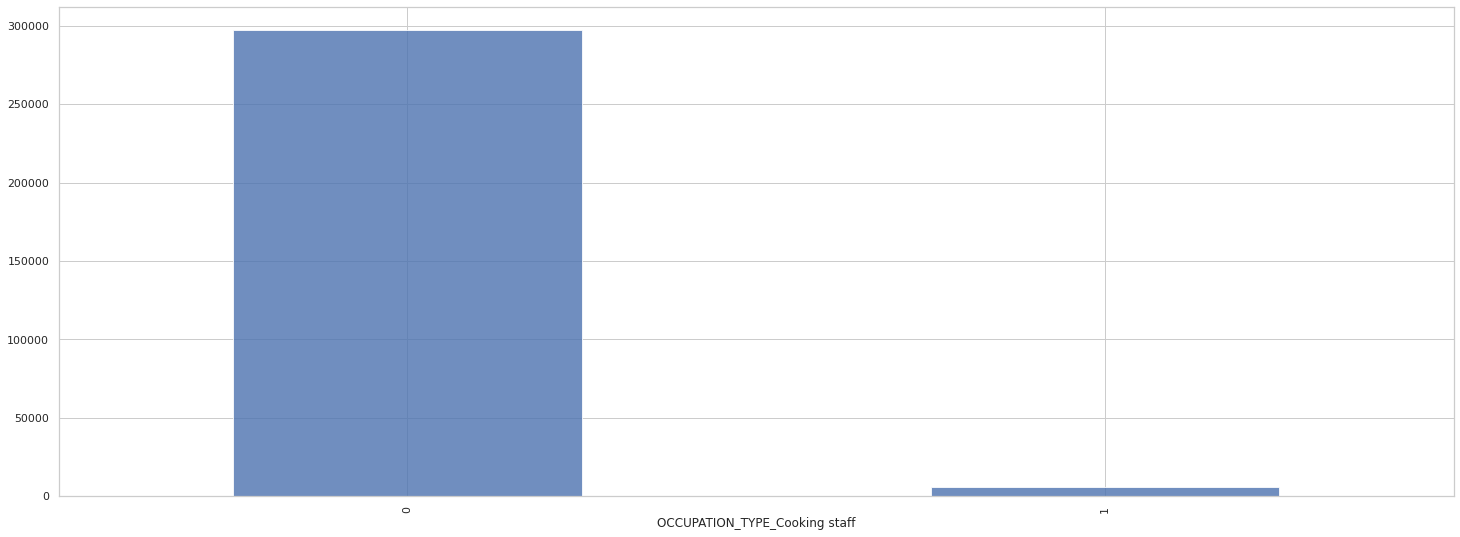

Participación de la categorías de OCCUPATION_TYPE_Core staff son: 
 OCCUPATION_TYPE_Core staff
0    91.030903
1     8.969097
Name: SK_ID_CURR, dtype: float64 



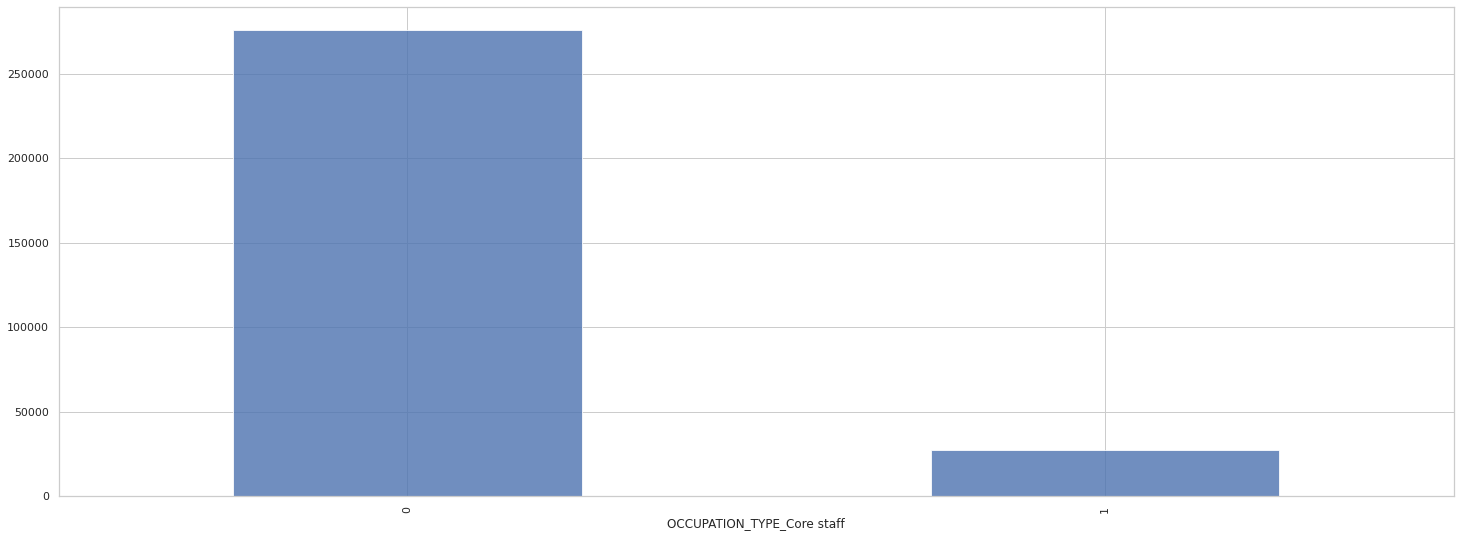

Participación de la categorías de OCCUPATION_TYPE_Drivers son: 
 OCCUPATION_TYPE_Drivers
0    93.940254
1     6.059746
Name: SK_ID_CURR, dtype: float64 



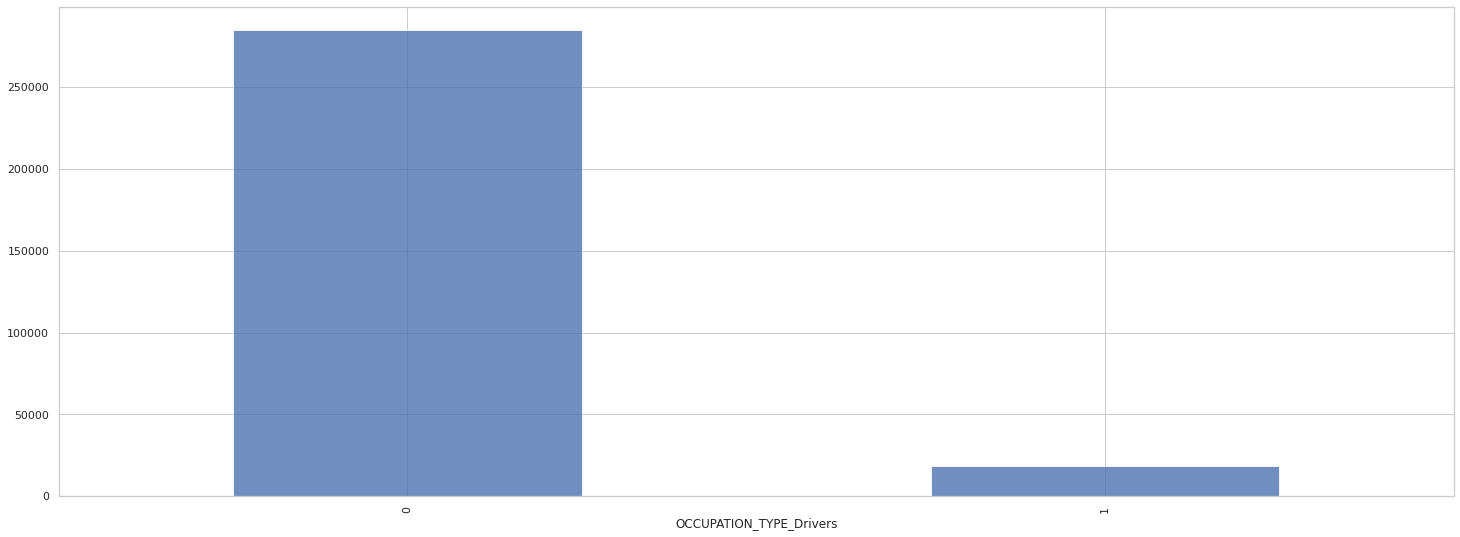

Participación de la categorías de OCCUPATION_TYPE_HR staff son: 
 OCCUPATION_TYPE_HR staff
0    99.817732
1     0.182268
Name: SK_ID_CURR, dtype: float64 



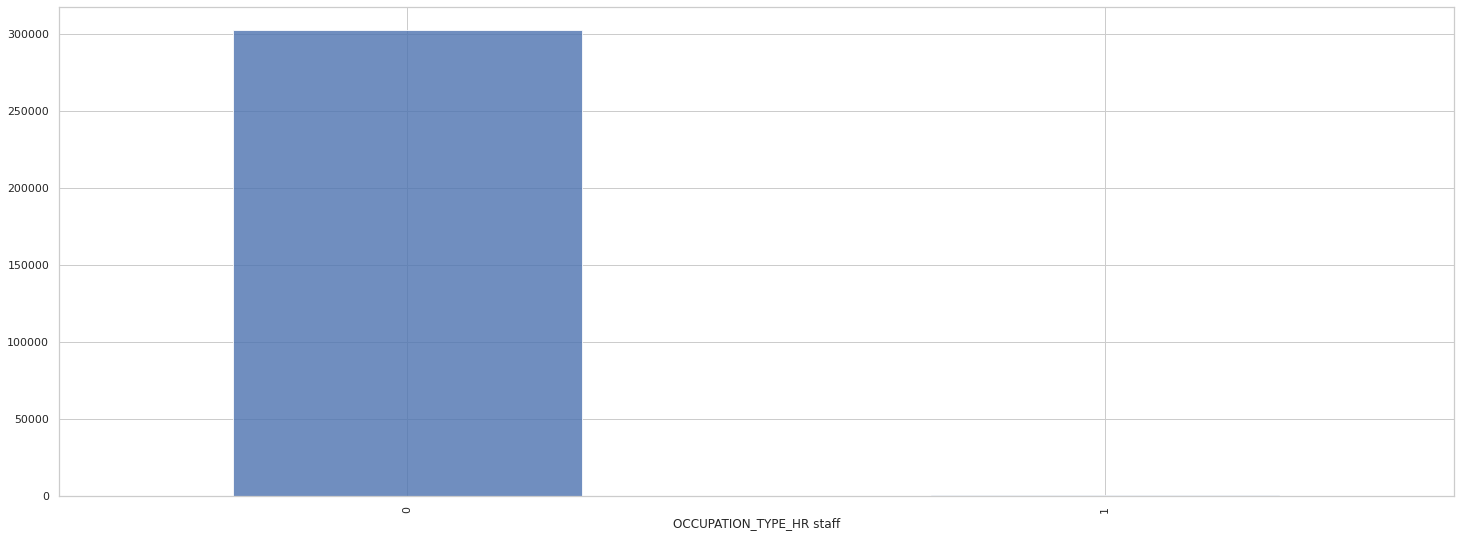

Participación de la categorías de OCCUPATION_TYPE_High skill tech staff son: 
 OCCUPATION_TYPE_High skill tech staff
0    96.288604
1     3.711396
Name: SK_ID_CURR, dtype: float64 



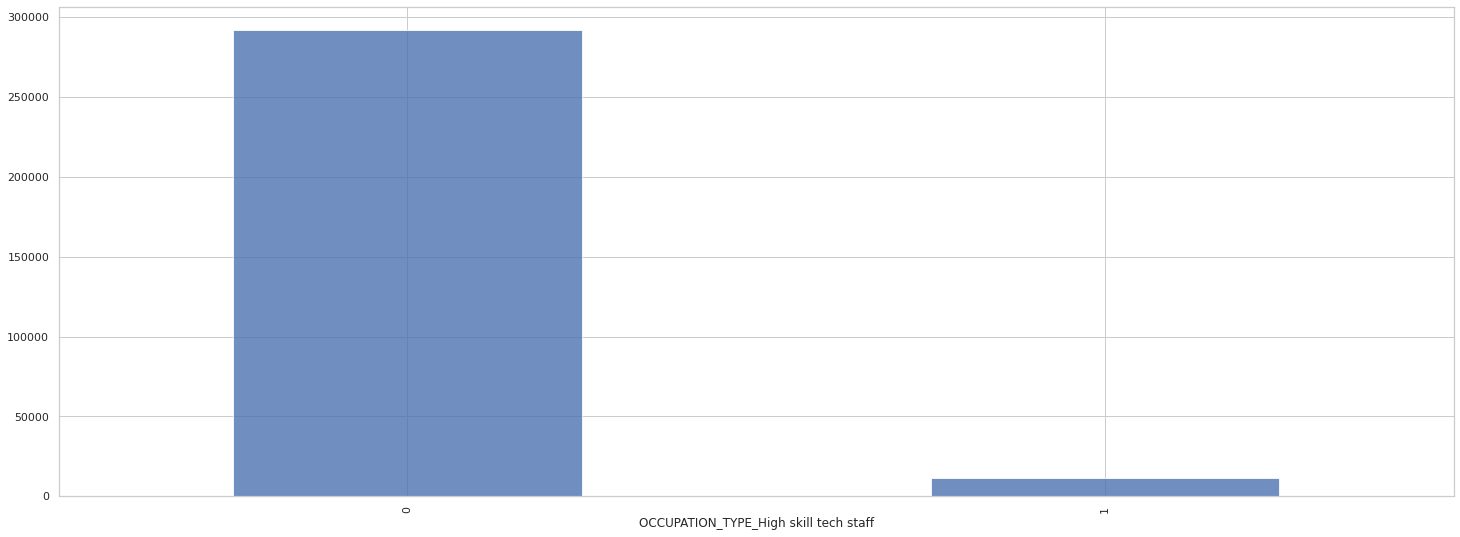

Participación de la categorías de OCCUPATION_TYPE_IT staff son: 
 OCCUPATION_TYPE_IT staff
0    99.83028
1     0.16972
Name: SK_ID_CURR, dtype: float64 



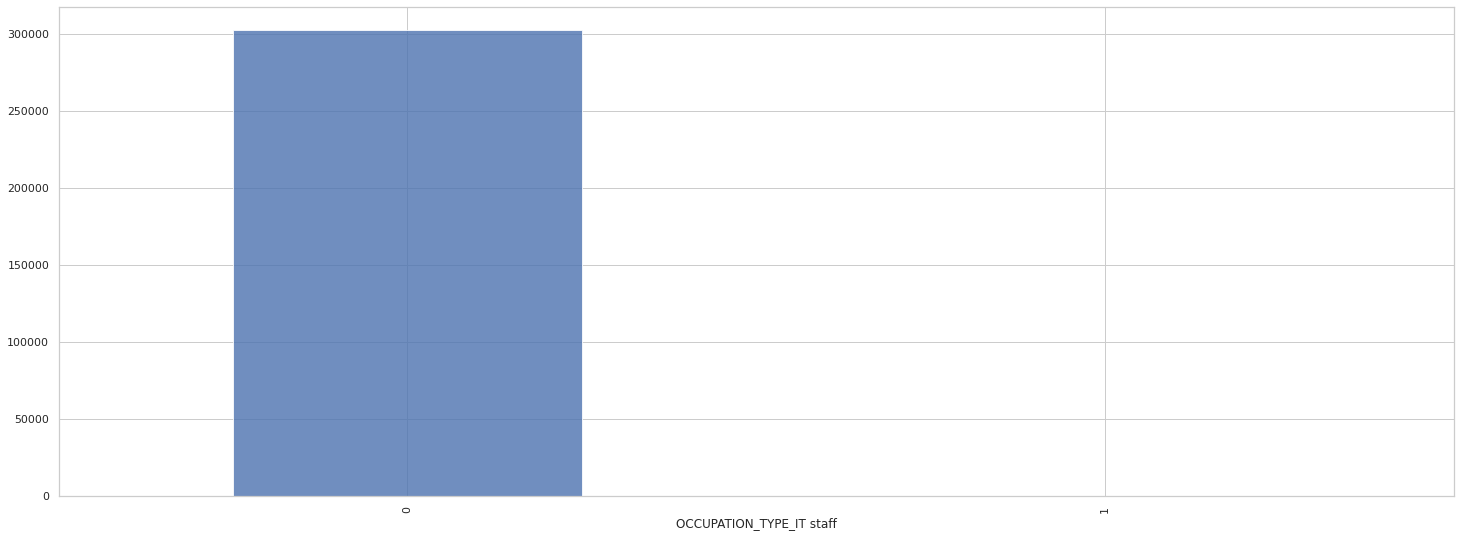

Participación de la categorías de OCCUPATION_TYPE_Laborers son: 
 OCCUPATION_TYPE_Laborers
0    81.989493
1    18.010507
Name: SK_ID_CURR, dtype: float64 



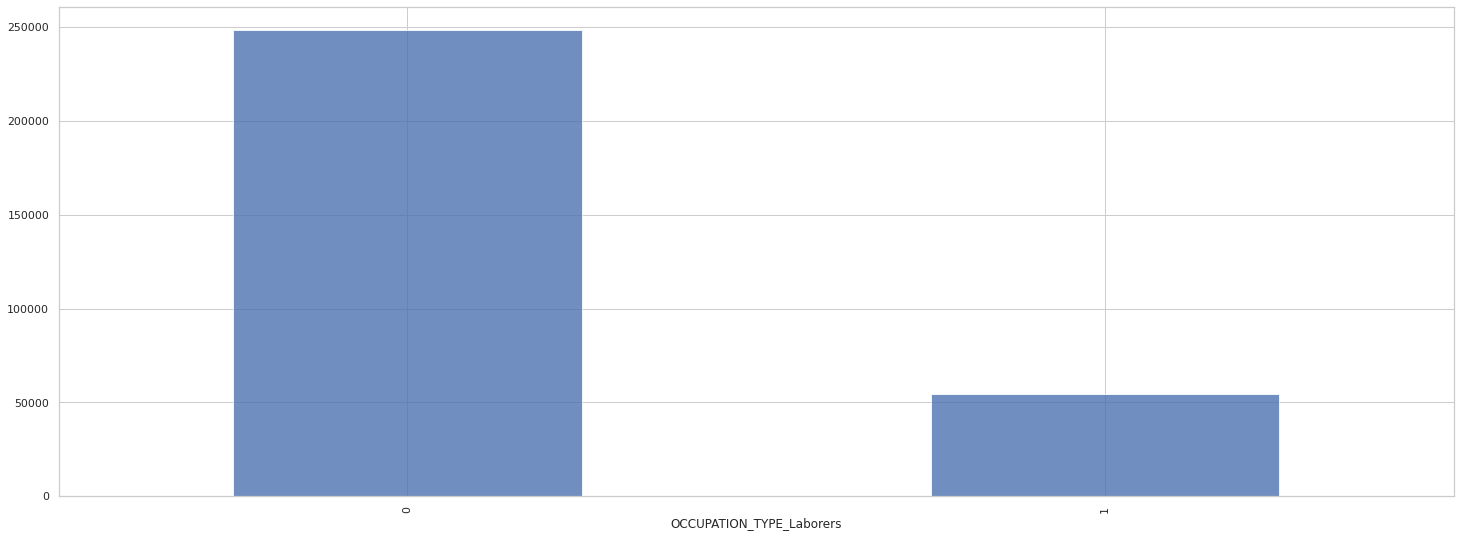

Participación de la categorías de OCCUPATION_TYPE_Low-skill Laborers son: 
 OCCUPATION_TYPE_Low-skill Laborers
0    99.317486
1     0.682514
Name: SK_ID_CURR, dtype: float64 



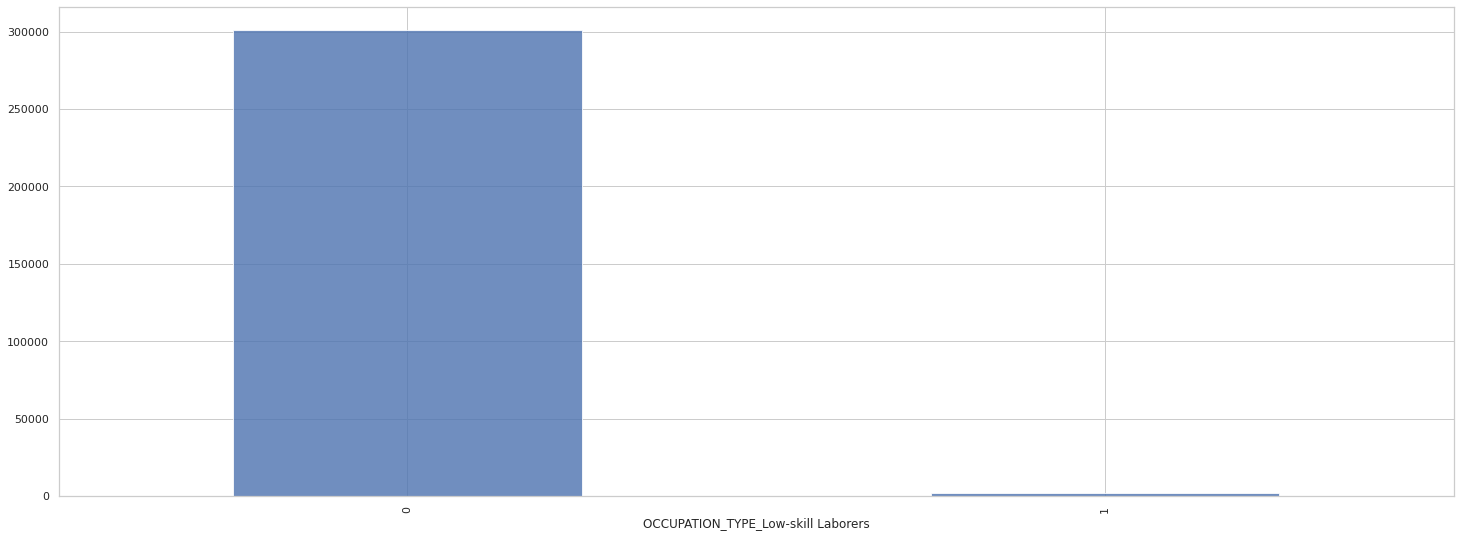

Participación de la categorías de OCCUPATION_TYPE_Managers son: 
 OCCUPATION_TYPE_Managers
0    93.269958
1     6.730042
Name: SK_ID_CURR, dtype: float64 



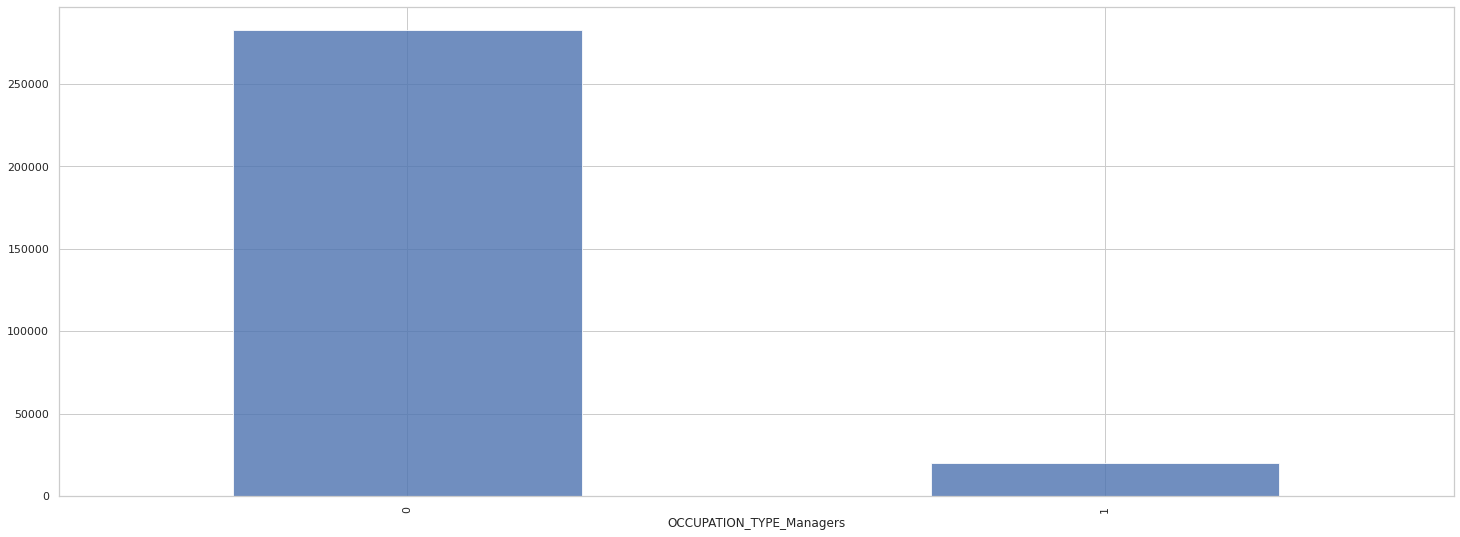

Participación de la categorías de OCCUPATION_TYPE_Medicine staff son: 
 OCCUPATION_TYPE_Medicine staff
0    97.208198
1     2.791802
Name: SK_ID_CURR, dtype: float64 



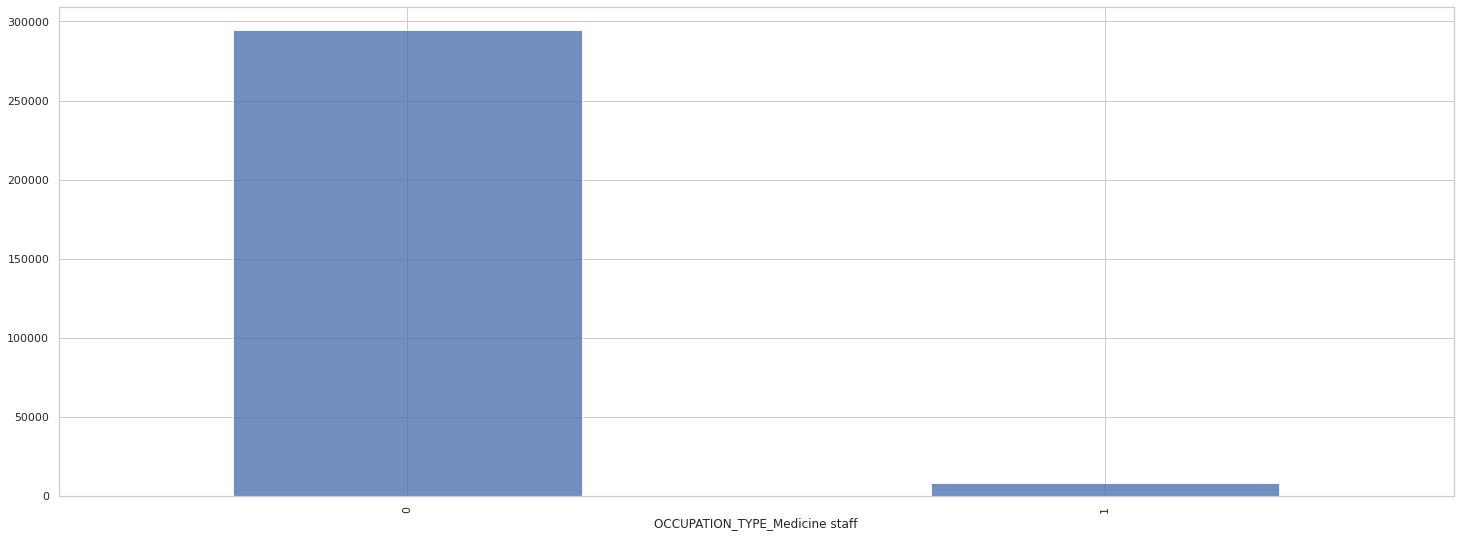

Participación de la categorías de OCCUPATION_TYPE_Private service staff son: 
 OCCUPATION_TYPE_Private service staff
0    99.136209
1     0.863791
Name: SK_ID_CURR, dtype: float64 



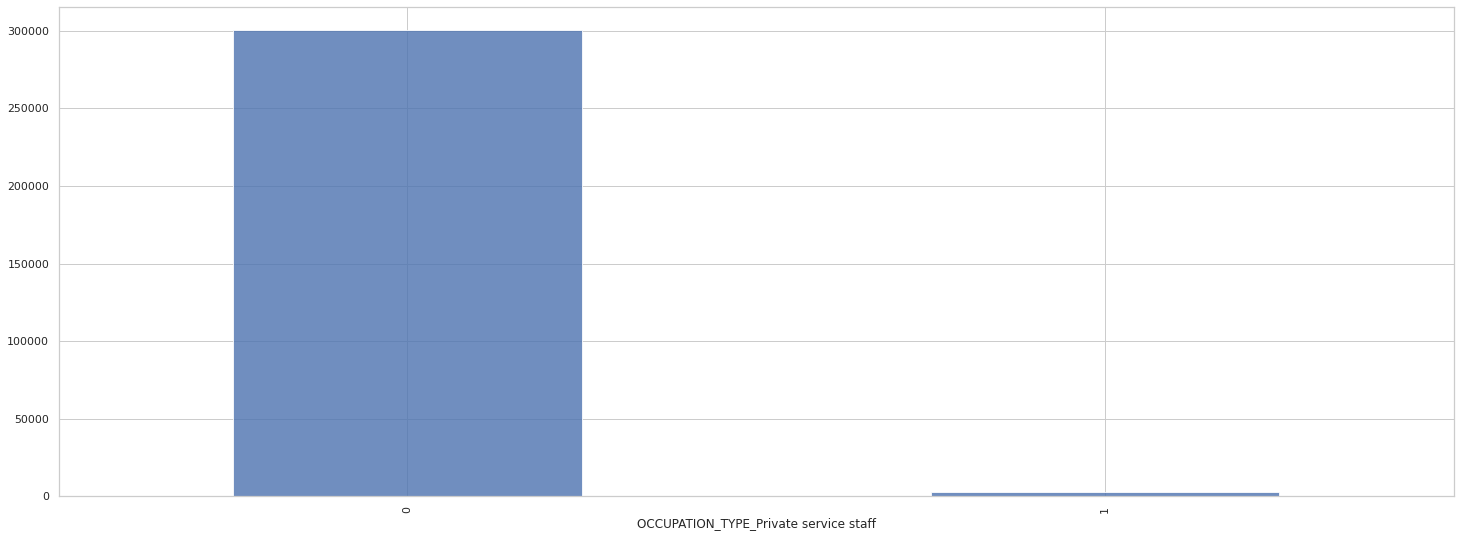

Participación de la categorías de OCCUPATION_TYPE_Realty agents son: 
 OCCUPATION_TYPE_Realty agents
0    99.755986
1     0.244014
Name: SK_ID_CURR, dtype: float64 



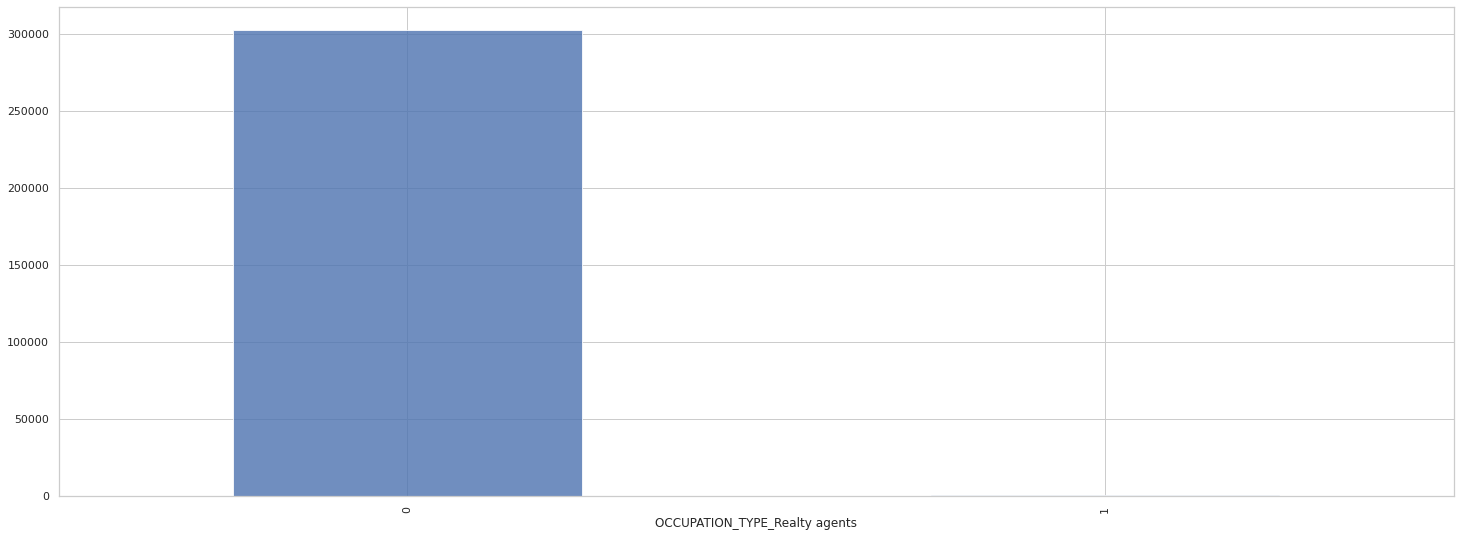

Participación de la categorías de OCCUPATION_TYPE_Sales staff son: 
 OCCUPATION_TYPE_Sales staff
0    89.532146
1    10.467854
Name: SK_ID_CURR, dtype: float64 



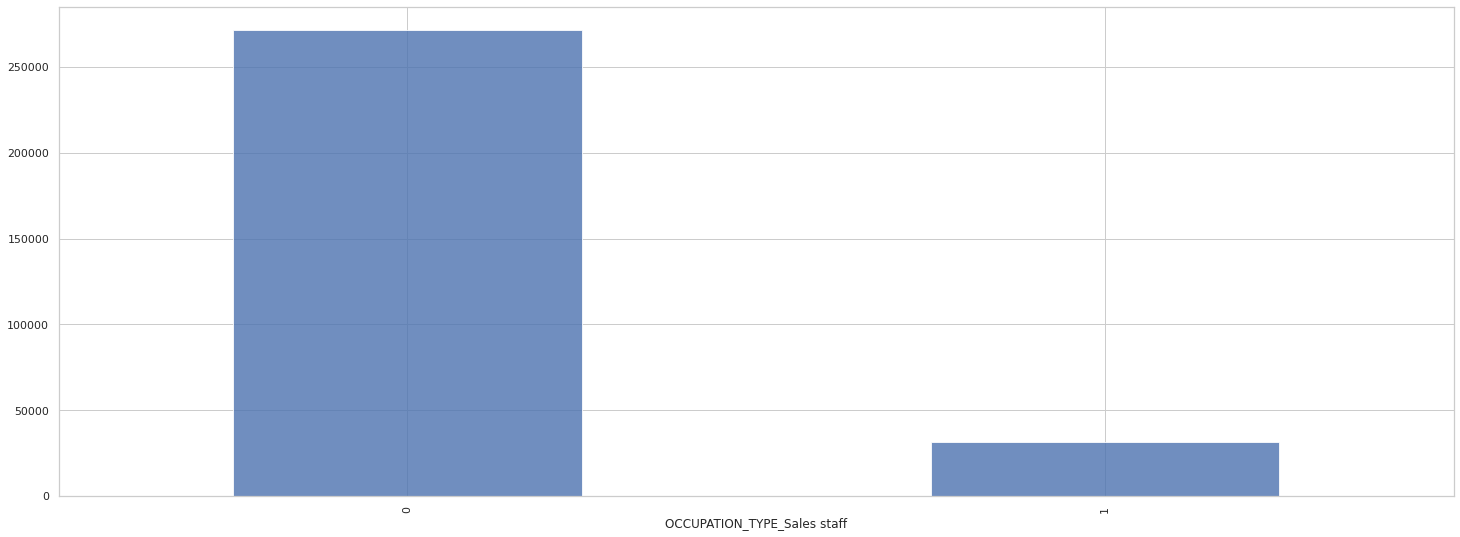

Participación de la categorías de OCCUPATION_TYPE_Secretaries son: 
 OCCUPATION_TYPE_Secretaries
0    99.574708
1     0.425292
Name: SK_ID_CURR, dtype: float64 



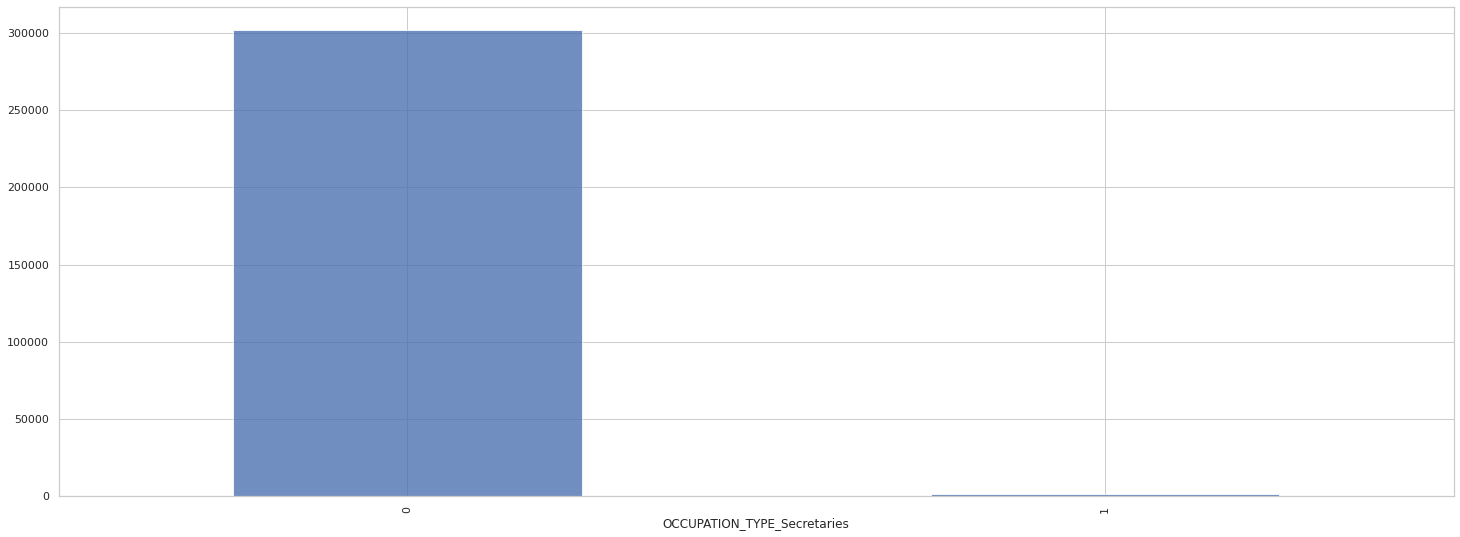

Participación de la categorías de OCCUPATION_TYPE_Security staff son: 
 OCCUPATION_TYPE_Security staff
0    97.804531
1     2.195469
Name: SK_ID_CURR, dtype: float64 



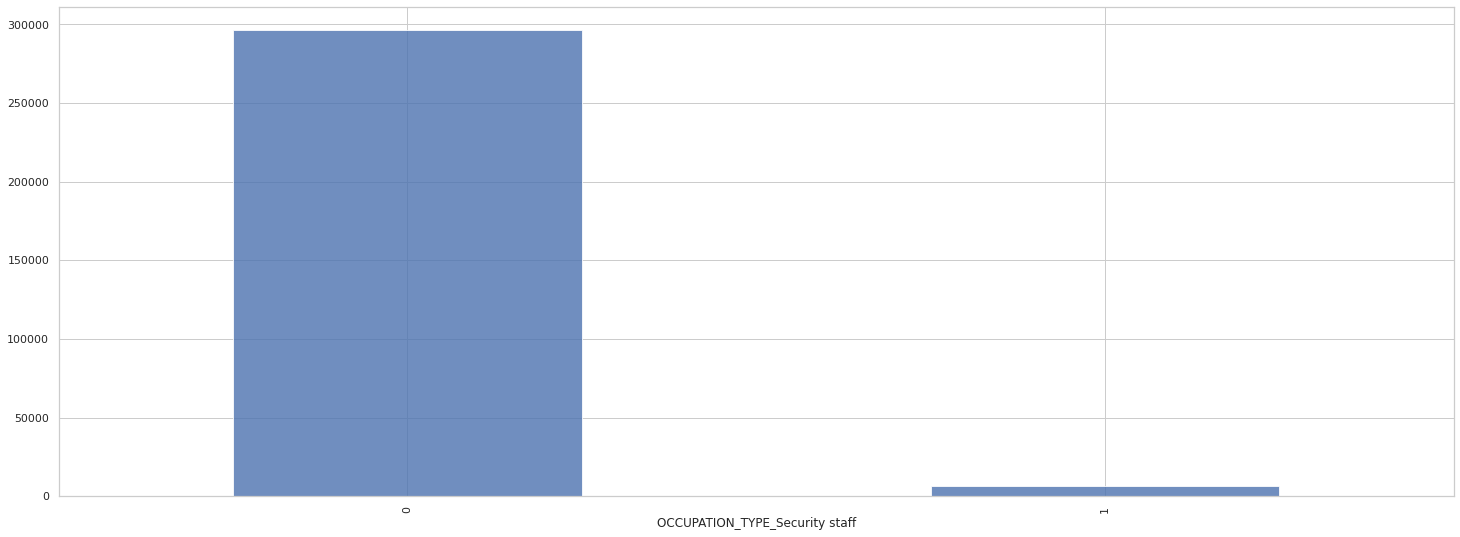

Participación de la categorías de OCCUPATION_TYPE_Waiters/barmen staff son: 
 OCCUPATION_TYPE_Waiters/barmen staff
0    99.56084
1     0.43916
Name: SK_ID_CURR, dtype: float64 



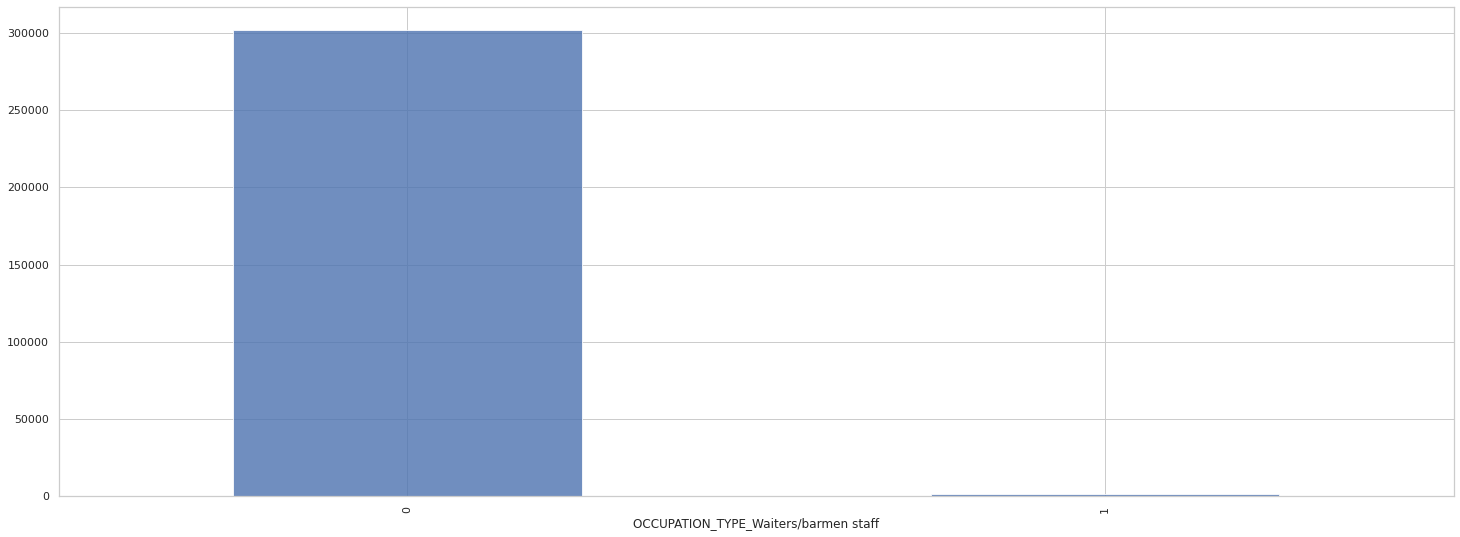

Participación de la categorías de FONDKAPREMONT_MODE_not specified son: 
 FONDKAPREMONT_MODE_not specified
0    98.156189
1     1.843811
Name: SK_ID_CURR, dtype: float64 



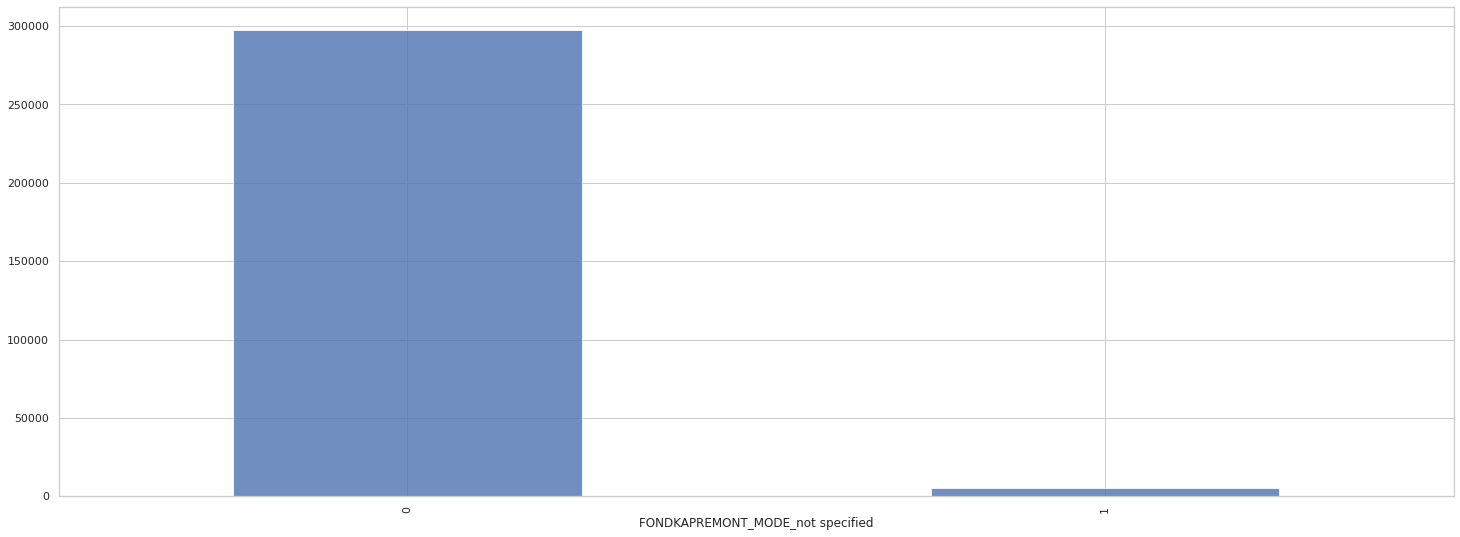

Participación de la categorías de FONDKAPREMONT_MODE_org spec account son: 
 FONDKAPREMONT_MODE_org spec account
0    98.185907
1     1.814093
Name: SK_ID_CURR, dtype: float64 



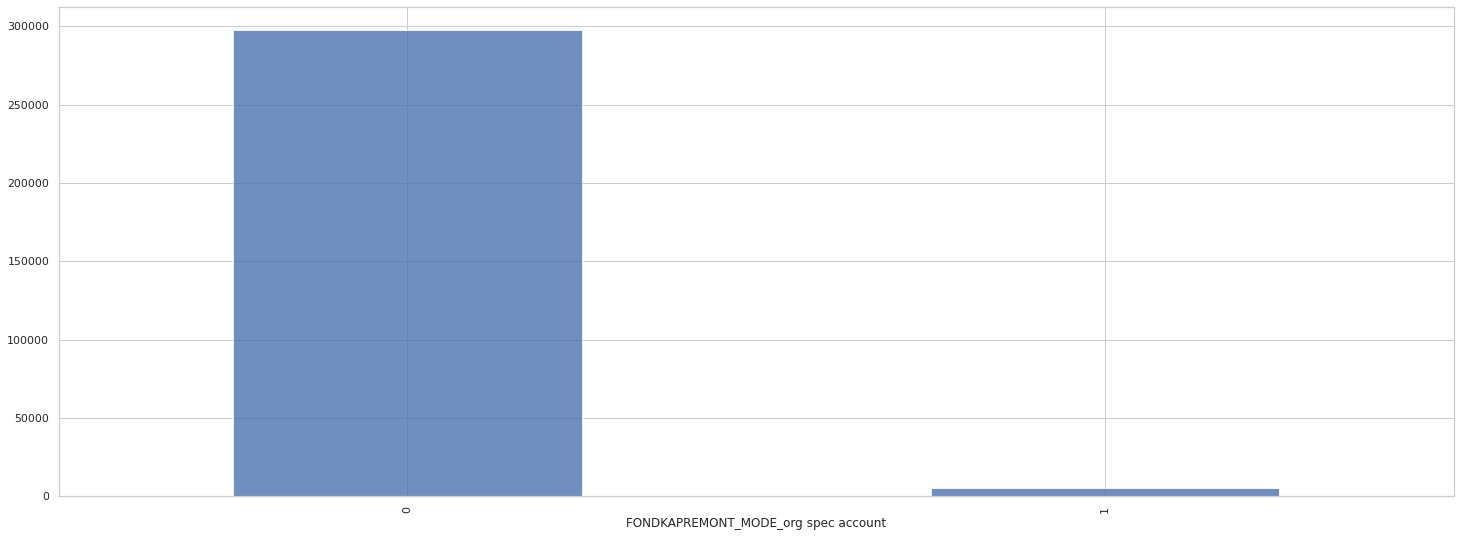

Participación de la categorías de FONDKAPREMONT_MODE_reg oper account son: 
 FONDKAPREMONT_MODE_reg oper account
0    76.043665
1    23.956335
Name: SK_ID_CURR, dtype: float64 



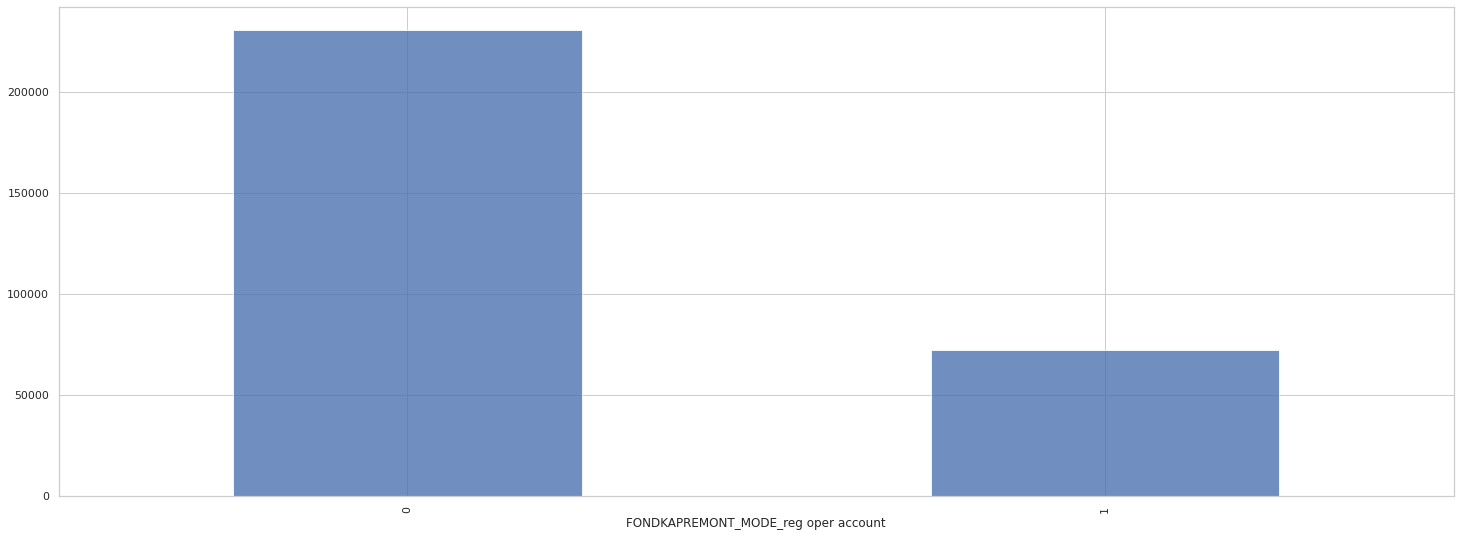

Participación de la categorías de FONDKAPREMONT_MODE_reg oper spec account son: 
 FONDKAPREMONT_MODE_reg oper spec account
0    96.07926
1     3.92074
Name: SK_ID_CURR, dtype: float64 



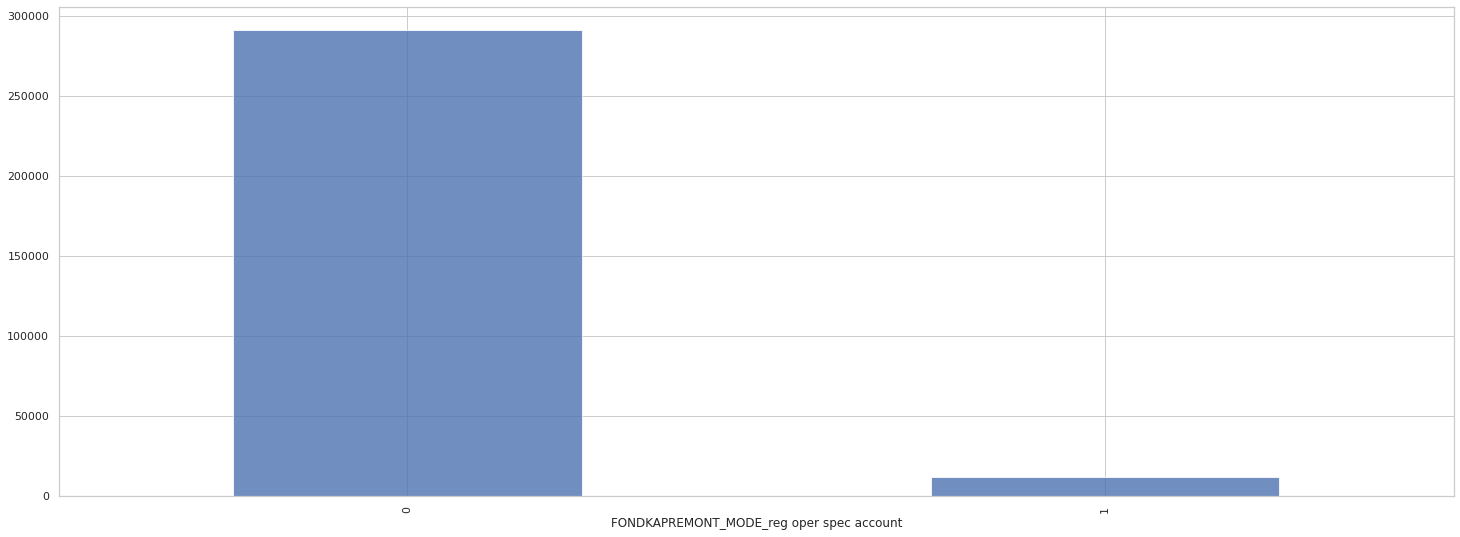

Participación de la categorías de HOUSETYPE_MODE_block of flats son: 
 HOUSETYPE_MODE_block of flats
0    51.136367
1    48.863633
Name: SK_ID_CURR, dtype: float64 



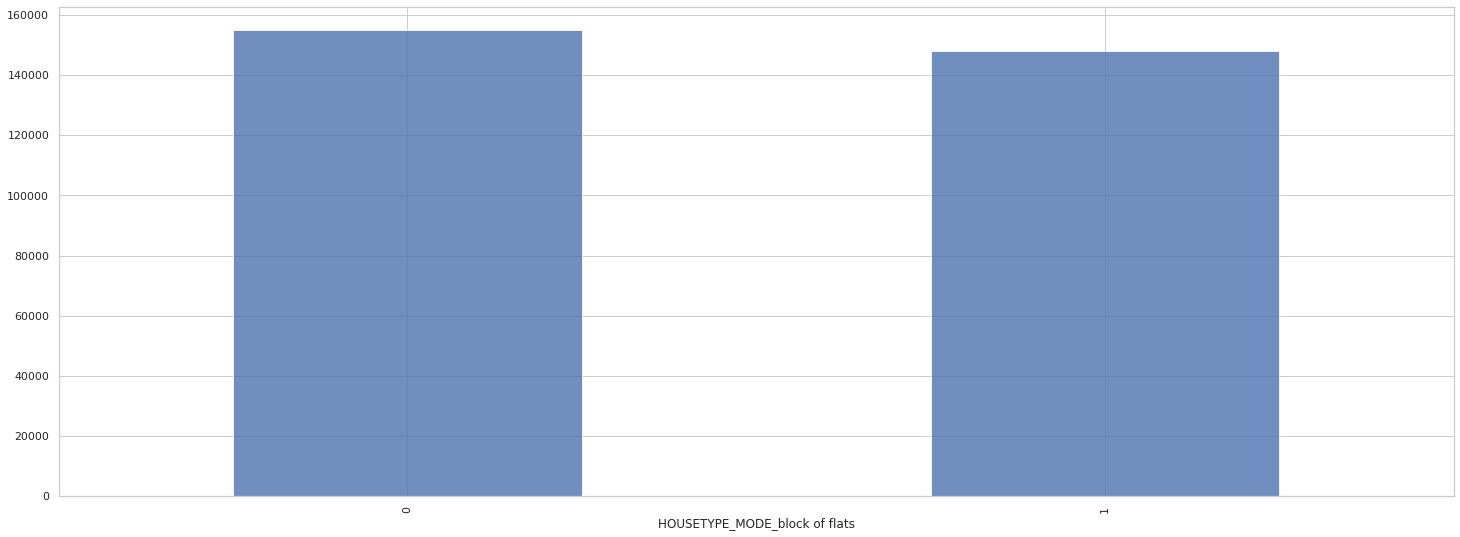

Participación de la categorías de HOUSETYPE_MODE_specific housing son: 
 HOUSETYPE_MODE_specific housing
0    99.511311
1     0.488689
Name: SK_ID_CURR, dtype: float64 



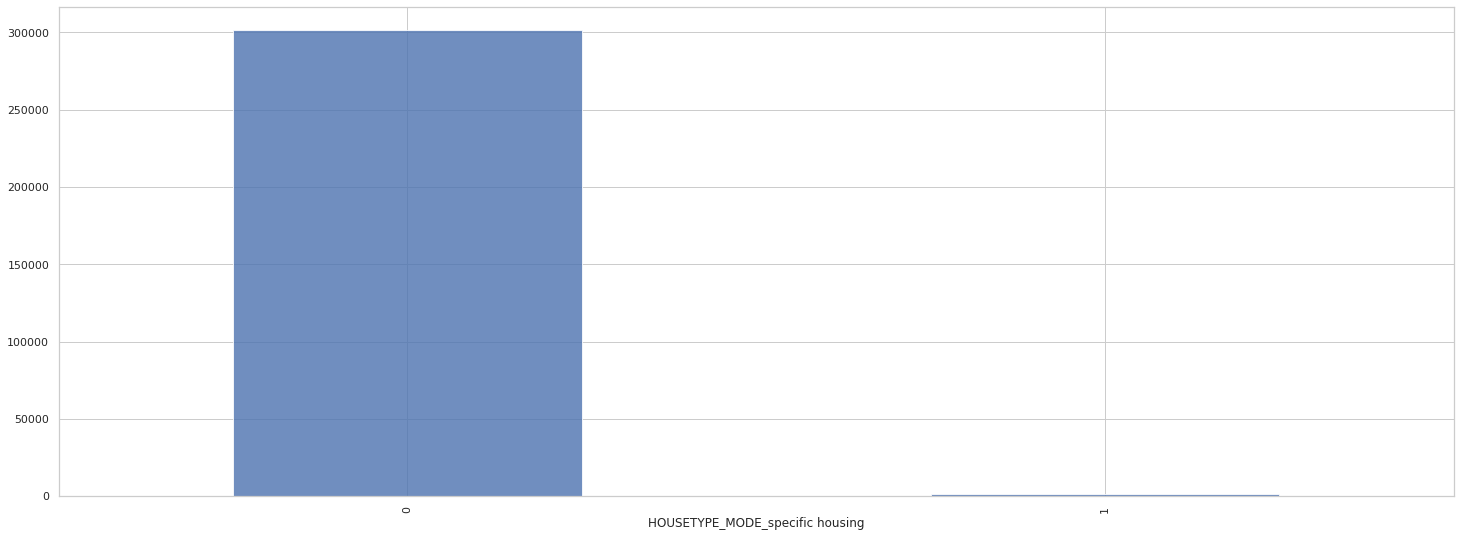

Participación de la categorías de HOUSETYPE_MODE_terraced house son: 
 HOUSETYPE_MODE_terraced house
0    99.606077
1     0.393923
Name: SK_ID_CURR, dtype: float64 



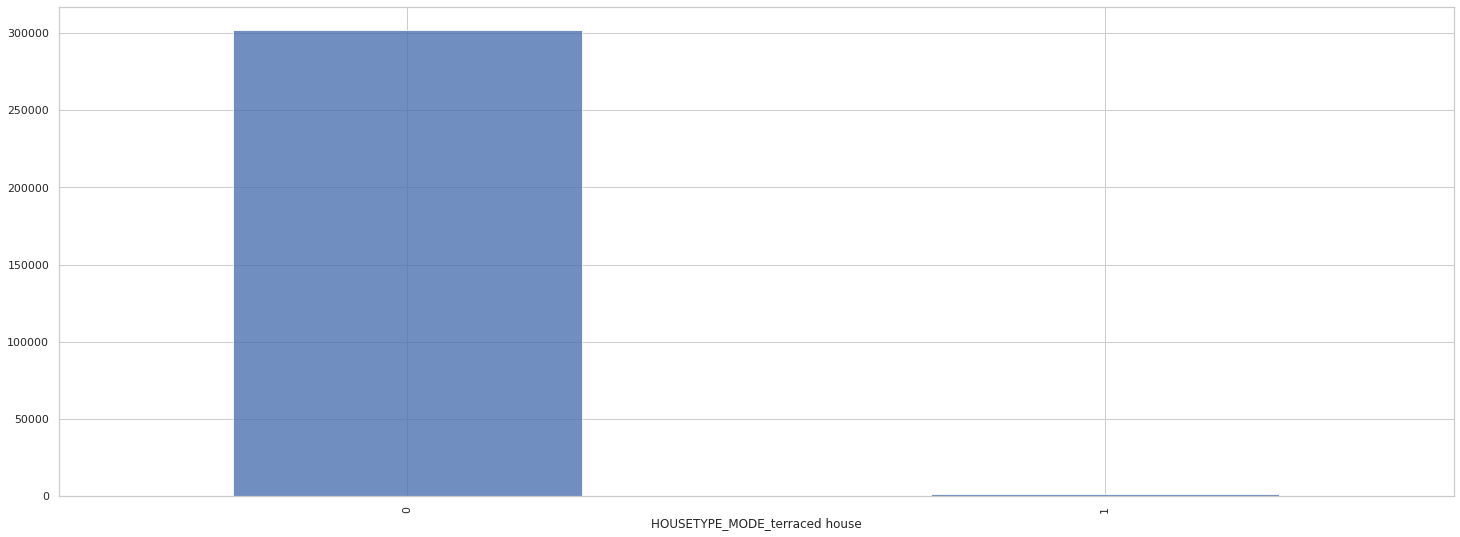

Participación de la categorías de WALLSMATERIAL_MODE_Block son: 
 WALLSMATERIAL_MODE_Block
0    97.005458
1     2.994542
Name: SK_ID_CURR, dtype: float64 



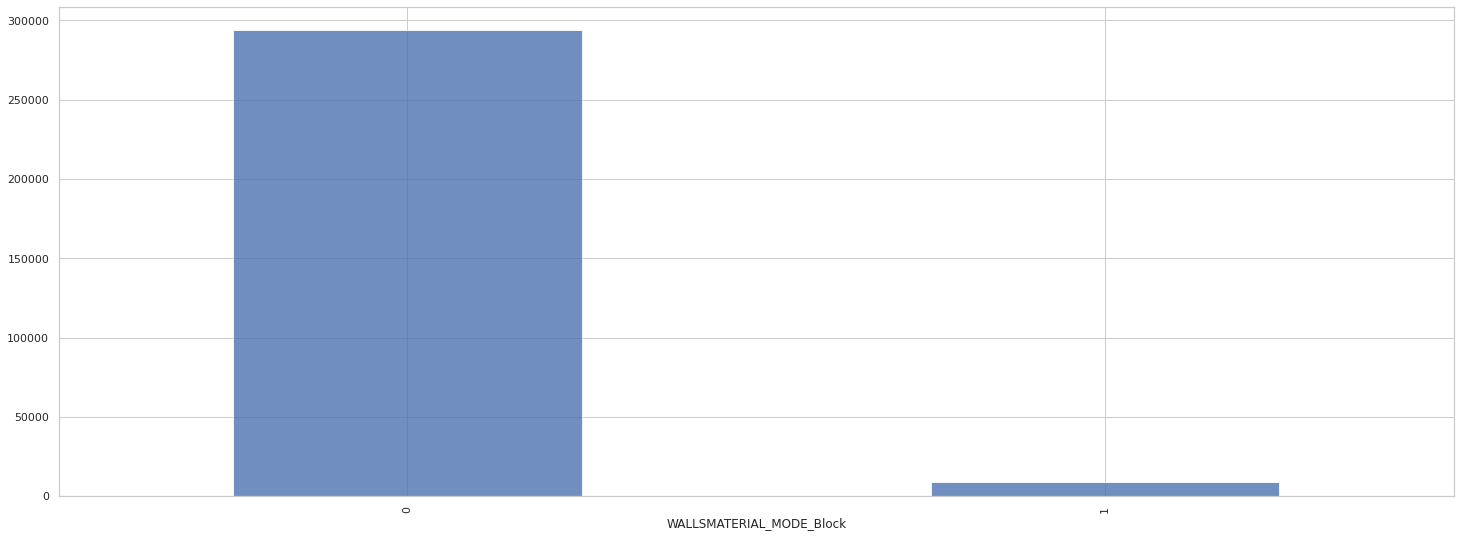

Participación de la categorías de WALLSMATERIAL_MODE_Mixed son: 
 WALLSMATERIAL_MODE_Mixed
0    99.254419
1     0.745581
Name: SK_ID_CURR, dtype: float64 



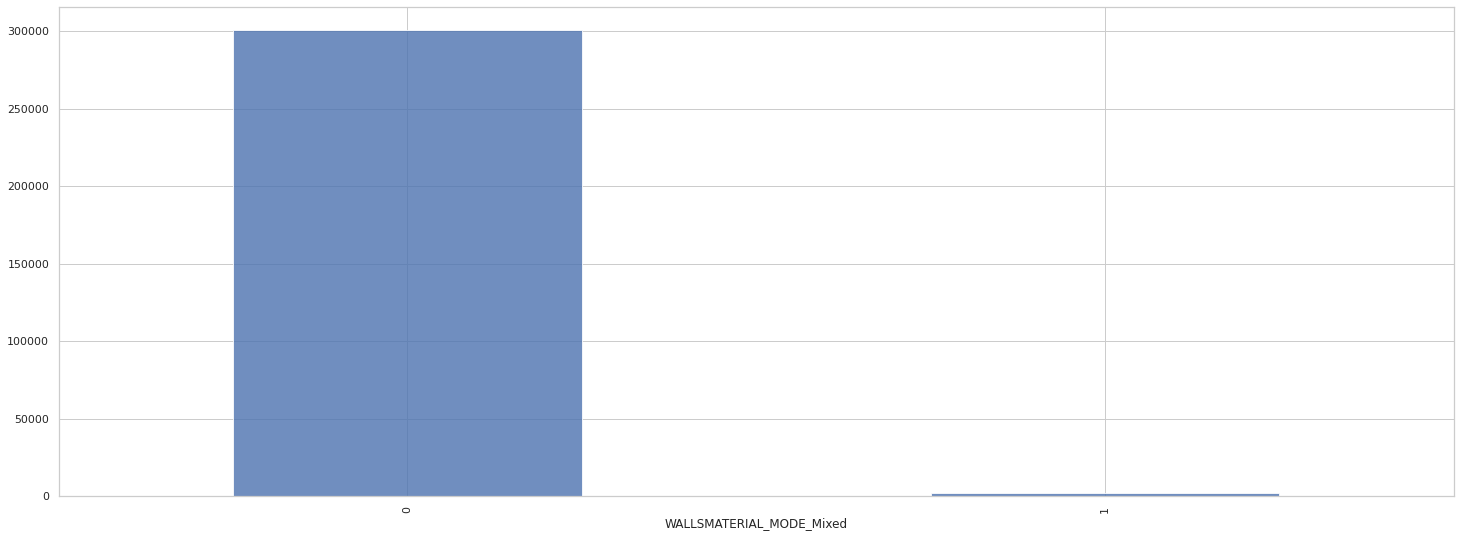

Participación de la categorías de WALLSMATERIAL_MODE_Monolithic son: 
 WALLSMATERIAL_MODE_Monolithic
0    99.436687
1     0.563313
Name: SK_ID_CURR, dtype: float64 



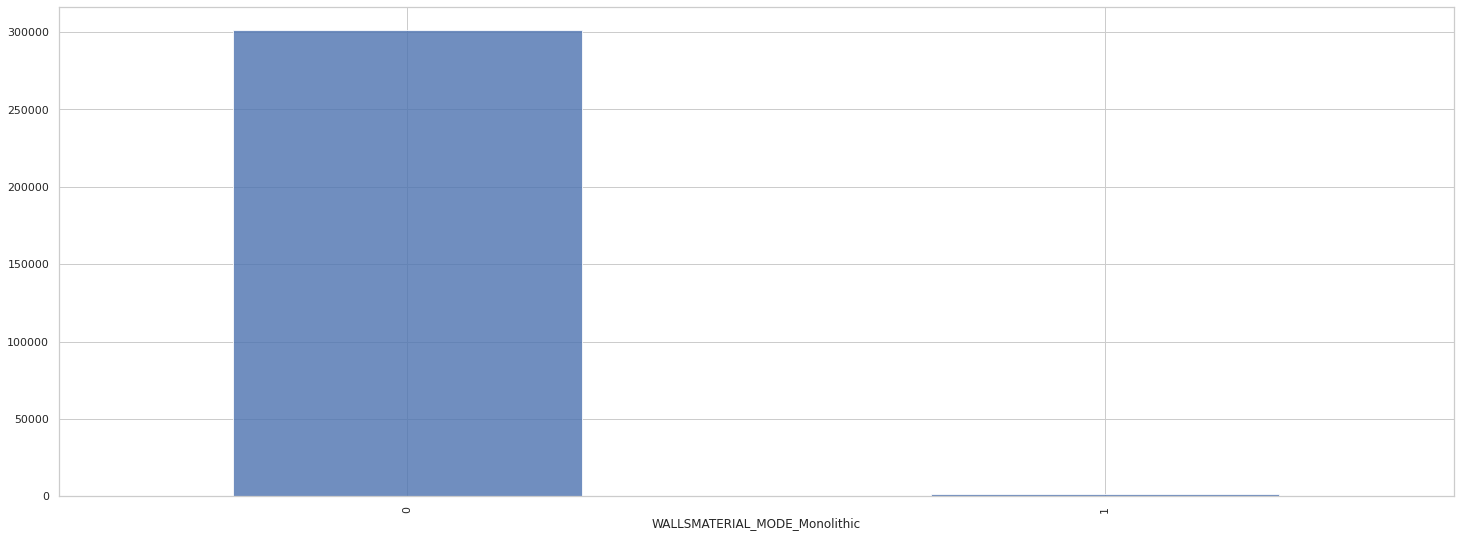

Participación de la categorías de WALLSMATERIAL_MODE_Others son: 
 WALLSMATERIAL_MODE_Others
0    99.472018
1     0.527982
Name: SK_ID_CURR, dtype: float64 



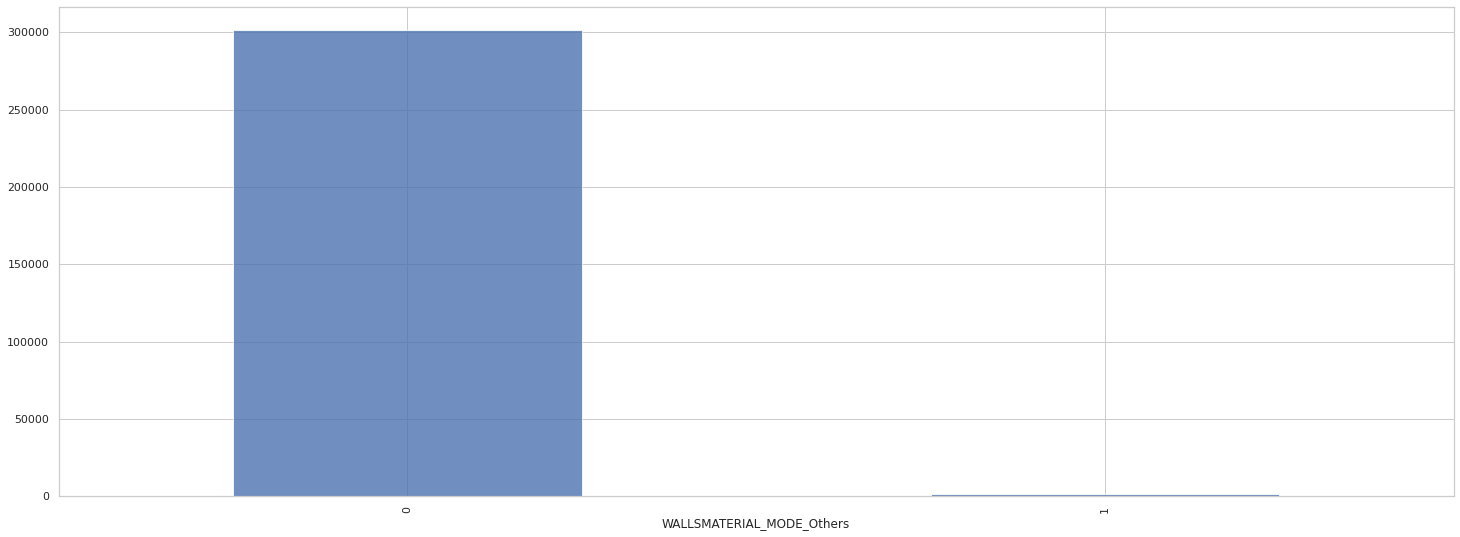

Participación de la categorías de WALLSMATERIAL_MODE_Panel son: 
 WALLSMATERIAL_MODE_Panel
0    78.562726
1    21.437274
Name: SK_ID_CURR, dtype: float64 



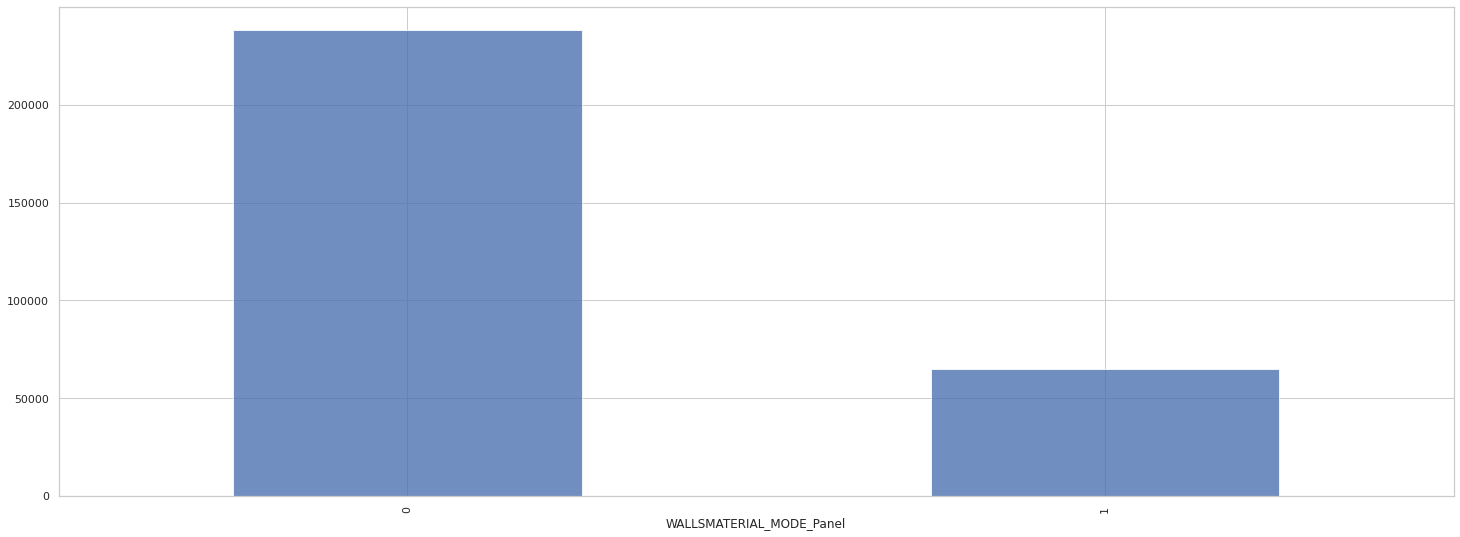

Participación de la categorías de WALLSMATERIAL_MODE_Stone, brick son: 
 WALLSMATERIAL_MODE_Stone, brick
0    78.935516
1    21.064484
Name: SK_ID_CURR, dtype: float64 



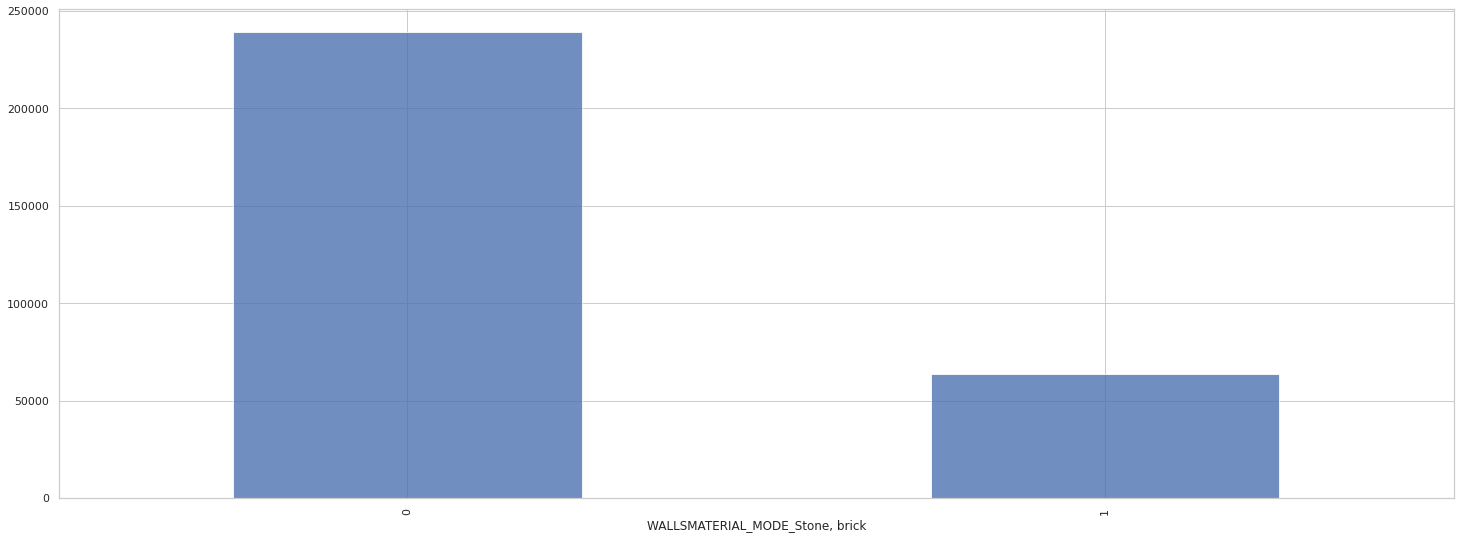

Participación de la categorías de WALLSMATERIAL_MODE_Wooden son: 
 WALLSMATERIAL_MODE_Wooden
0    98.256238
1     1.743762
Name: SK_ID_CURR, dtype: float64 



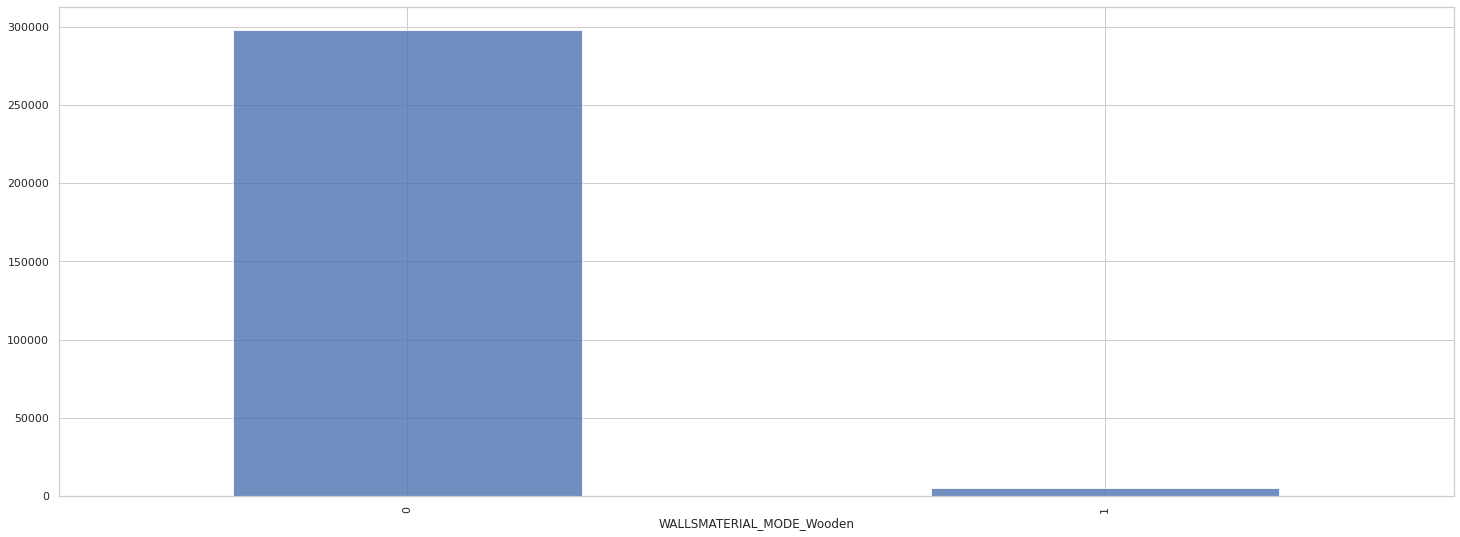

In [ ]:
for i in Categoricas[2:]:
    agrupa=data['SK_ID_CURR'].groupby(data[i]).count()
    agrupa.plot.bar(alpha=0.8)
    print(f'Participación de la categorías de {i} son: \n {100*agrupa/len(data)} \n')
    plt.show()

A partir de la exploración anterior, se identifica que las siguientes variables requieren de una transformación adicional, pues el desbalance que presentan dentro de las diferentes categórias permite inferir que no aportarán información a la hora de predecir nuestro TARGET. Sin embargo, se hará una prueba de * Chi-Cuadrado * para validar este supuesto.

Las variables que se deben de revisar son: 
* NAME_INCOME_TYPE_Businessman, NAME_INCOME_TYPE_State servant
* NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student
* NAME_INCOME_TYPE_Unemployed

* NAME_EDUCATION_TYPE_Academic degree
* NAME_EDUCATION_TYPE_Lower secondary

* NAME_HOUSING_TYPE_Co-op apartment
* NAME_HOUSING_TYPE_Office apartment

* OCCUPATION_TYPE_Cleaning staff
* OCCUPATION_TYPE_Cooking staff
* OCCUPATION_TYPE_HR staff
* OCCUPATION_TYPE_IT staff
* OCCUPATION_TYPE_Low-skill Laborers
* OCCUPATION_TYPE_Private service staff
* OCCUPATION_TYPE_Realty agents
* OCCUPATION_TYPE_Secretaries
* OCCUPATION_TYPE_Waiters/barmen staff

* FONDKAPREMONT_MODE_not specified

* HOUSETYPE_MODE_specific housing
* HOUSETYPE_MODE_terraced house
* WALLSMATERIAL_MODE_Mixed
* WALLSMATERIAL_MODE_Monolithic
* WALLSMATERIAL_MODE_Others
* WALLSMATERIAL_MODE_Wooden

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} es IMPORTANTE para la predicción".format(colX)
        else:
            result="{0} no es una feature importante. (Descartar {0} del modelo)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index =                                                       self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [ ]:
#Initialize ChiSquare Class
cT = ChiSquare(data)
#categorical variables: las que en data.info son objetos
testCol = Categoricas

In [ ]:
for var in Categoricas[2:]:
    cT.TestIndependence(colX=var,colY='TARGET')

FLAG_OWN_CAR es IMPORTANTE para la predicción
FLAG_OWN_REALTY es IMPORTANTE para la predicción
REGION_RATING_CLIENT_W_CITY es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Businessman no es una feature importante. (Descartar NAME_INCOME_TYPE_Businessman del modelo)
NAME_INCOME_TYPE_Commercial associate es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Maternity leave no es una feature importante. (Descartar NAME_INCOME_TYPE_Maternity leave del modelo)
NAME_INCOME_TYPE_Pensioner es IMPORTANTE para la predicción
NAME_INCOME_TYPE_State servant es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Student no es una feature importante. (Descartar NAME_INCOME_TYPE_Student del modelo)
NAME_INCOME_TYPE_Unemployed es IMPORTANTE para la predicción
NAME_INCOME_TYPE_Working es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Academic degree es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Higher education es IMPORTANTE para la predicción
NAME_EDUCATION_TYPE_Incomplete higher no es una feature im

A realizar: 
* NAME_INCOME_TYPE_Businessman -> No transformar, eliminar. 
* NAME_INCOME_TYPE_State servant -> No transformar, es importante.
* NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student -> Juntar y volver a probar chi-cuadrado
* NAME_INCOME_TYPE_Unemployed -> No transformar, es importante.

* NAME_EDUCATION_TYPE_Academic degree -> No transformar, es importante.
* NAME_EDUCATION_TYPE_Lower secondary -> No transformar, es importante.

* NAME_HOUSING_TYPE_Co-op apartment -> No transformar, eliminar. 
* NAME_HOUSING_TYPE_Office apartment -> No transformar, es importante.

* OCCUPATION_TYPE_Cleaning staff  -> No transformar, es importante.
* OCCUPATION_TYPE_Cooking staff  -> No transformar, es importante.
* OCCUPATION_TYPE_Low-skill Laborers -> No transformar, es importante.
* OCCUPATION_TYPE_Private service staff -> No transformar, es importante. 
* OCCUPATION_TYPE_Secretaries,  OCCUPATION_TYPE_Realty agents, OCCUPATION_TYPE_HR staff, OCCUPATION_TYPE_IT staff
* OCCUPATION_TYPE_Waiters/barmen staff   -> No transformar, es importante.

* FONDKAPREMONT_MODE_not specified -> No transformar, eliminar.

* HOUSETYPE_MODE_specific housing-> No transformar, es importante.
* HOUSETYPE_MODE_terraced house -> No transformar, eliminar.
* WALLSMATERIAL_MODE_Mixed -> No transformar, eliminar.
* WALLSMATERIAL_MODE_Monolithic, WALLSMATERIAL_MODE_Others
* WALLSMATERIAL_MODE_Wooden -> No transformar, es importante.

Otras variables a eliminar: 
* NAME_EDUCATION_TYPE_Incomplete higher
* NAME_HOUSING_TYPE_Co-op apartment
* NAME_HOUSING_TYPE_Municipal apartment


In [ ]:
lista_cat_borrar=['NAME_INCOME_TYPE_Businessman','NAME_HOUSING_TYPE_Co-op apartment','FONDKAPREMONT_MODE_not specified',\
                  'HOUSETYPE_MODE_terraced house','WALLSMATERIAL_MODE_Mixed',\
                  'NAME_EDUCATION_TYPE_Incomplete higher','NAME_HOUSING_TYPE_Municipal apartment']

In [ ]:
#Realizar el drop de las variables
for i in lista_cat_borrar:
  data.drop([i],axis=1,inplace=True)

In [ ]:
#Realiza combinación lineal de ciertas variables
data['NAME_INCOME_TYPE_Maternity leave']=((data['NAME_INCOME_TYPE_Maternity leave'].astype(int)) | \
                                          (data['NAME_INCOME_TYPE_Student'].astype(int))\
                                          ).astype('category')
data.rename(columns={'NAME_INCOME_TYPE_Maternity leave': 'NAME_INCOME_TYPE_Others'}, inplace=True)

In [ ]:
data['OCCUPATION_TYPE_Secretaries']= ((data['OCCUPATION_TYPE_Secretaries'].astype(int)) | \
                                      (data['OCCUPATION_TYPE_Realty agents'].astype(int)) | \
                                      (data['OCCUPATION_TYPE_HR staff'].astype(int)) | \
                                      (data['OCCUPATION_TYPE_IT staff'].astype(int)) \
                                      ).astype('category')
data.rename(columns={'OCCUPATION_TYPE_Secretaries': 'OCCUPATION_TYPE_Others'}, inplace=True)

In [ ]:
data['WALLSMATERIAL_MODE_Others']=((data['WALLSMATERIAL_MODE_Monolithic'].astype(int)) | \
                                          (data['NAME_INCOME_TYPE_Student'].astype(int))\
                                          ).astype('category')

In [ ]:
#Initialize ChiSquare Class
cT = ChiSquare(data)
vbles_a_probar=['NAME_INCOME_TYPE_Others','OCCUPATION_TYPE_Others','WALLSMATERIAL_MODE_Others']
#categorical variables: las que en data.info son objetos
testCol = vbles_a_probar

for var in vbles_a_probar:
    cT.TestIndependence(colX=var,colY='TARGET')

NAME_INCOME_TYPE_Others no es una feature importante. (Descartar NAME_INCOME_TYPE_Others del modelo)
OCCUPATION_TYPE_Others es IMPORTANTE para la predicción
WALLSMATERIAL_MODE_Others es IMPORTANTE para la predicción


In [ ]:
#Se realiza drop de NAME_INCOME_TYPE_Other
data.drop(['NAME_INCOME_TYPE_Others'],axis=1,inplace=True)

In [ ]:
#Se verifica nueva dimensión de la data
data.shape

(302851, 84)

### 4.5.2 Numéricas

In [ ]:
Categoricas=[]
Cuantitativas=[]
for col in data:
  if not isinstance(data[col][0], (int, float, complex)):
    Categoricas.append(col)
  else: Cuantitativas.append(col)

In [ ]:
for i in Cuantitativas:
  print(data[i].describe())

count    302851.000000
mean          0.416366
std           0.721546
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
count    302851.000000
mean     164835.622560
std       81645.753998
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      625500.000000
Name: AMT_INCOME_TOTAL, dtype: float64
count    3.028510e+05
mean     5.970346e+05
std      3.997172e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.123385e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT_x, dtype: float64
count    302851.000000
mean      26976.800448
std       14202.464525
min        1615.500000
25%       16488.000000
50%       24844.500000
75%       34569.000000
max      225000.000000
Name: AMT_ANNUITY_x, dtype: float64
count    302851.000000
mean         43.951039
std          11.977579
min          21.000000
25%          34.000000
50%         

In [ ]:
newdf = data.select_dtypes(include=['int64','float64'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302851 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   CNT_CHILDREN                               302851 non-null  float64
 1   AMT_INCOME_TOTAL                           302851 non-null  float64
 2   AMT_CREDIT_x                               302851 non-null  float64
 3   AMT_ANNUITY_x                              302851 non-null  float64
 4   DAYS_BIRTH                                 302851 non-null  float64
 5   MONTHS_EMPLOYED                            302851 non-null  float64
 6   EXT_SOURCE_2                               302851 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE                   302851 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE                   302851 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE                   302851 non-null  float64
 10  DEF_60_C

In [ ]:
newdf_corr = newdf.corr()

In [ ]:
#Matriz de Correlación
px.imshow(newdf_corr,  width=800, height=800)

Se debe seleccionar solo una de las siguientes variables a partir del criterio de que 2 variables explicativas no deberían tener una correlación sup a 0.3
* 2 o 3 -> Se deja la 3 "AMT_ANNUITY_x", pues según el valor de esta, dependerá AMT_CREDIT_x
* 4 o 5 -> Sirve más los meses desde que está empleado, más que la edad. 
* 7 o 8 -> Se deja OBS_30_CNT_SOCIAL_CIRCLE
* 7 o 9 -> Se dejan ambas, pues que una persona ruede a mora 30 no necesariamente implica que se rodará a 60.
* 9 o 10 -> Se deja OBS_60_CNT_SOCIAL_CIRCLE                   
* 7 o 10 -> Se elimina DEF_60_CNT_SOCIAL_CIRCLE
* 11 o 12 -> Se deja AMT_REQ_CREDIT_BUREAU_WEEK, pues trae más información que un cliente que consultó en el últ. día
* 19 o 32 -> No s epuede eliminar CREDIT_TYPE_Mortgage porque es la cant de créditos hipotecarios
* 19 O 20 -> AMT_CREDIT_SUM es el crédito total, y AMT_CREDIT_SUM_DEBT es lo que debe actualmente. Por la alta correlación entre estas dos, se crea una variable:AMT_CREDIT_SUM_DEBT / AMT_CREDIT_SUM 
* 20 o 32 -> Se soluciona eliminando AMT_CREDIT_SUM 
* 19 o 23 -> Se soluciona eliminando AMT_CREDIT_SUM 
* 19 o 25 -> Se soluciona eliminando AMT_CREDIT_SUM
* 21 o 29 -> Se elimina CREDIT_TYPE_Credit card, pues interesa más saber cuanto adeuda en otros productos financieros, que la cantidad, pues no todos los productos deben de tener estrictamente un saldo superior a 0 
* 23 o 25 -> Interesa más saber los créditos activos. Se borra CREDIT_ACTIVE_Closed                       
* 23 o 28 -> Se elimina CREDIT_ACTIVE_Active
* 23 o 29 -> Se elimina CREDIT_ACTIVE_Active
* 25 o 28 -> Se borra CREDIT_ACTIVE_Closed
* 25 o 29 -> Se borra CREDIT_ACTIVE_Closed
* 28 o 29 -> No se borra, pues un cliente puede tener ambos.

In [ ]:
data['indice_falta_pagar']=data['AMT_CREDIT_SUM_DEBT']/data['AMT_CREDIT_SUM']

In [ ]:
data.drop(['AMT_CREDIT_x','DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',\
               'AMT_REQ_CREDIT_BUREAU_DAY', 'CREDIT_TYPE_Mortgage','AMT_CREDIT_SUM_DEBT',\
               'AMT_CREDIT_SUM','CREDIT_TYPE_Credit card','CREDIT_ACTIVE_Closed','CREDIT_ACTIVE_Active'],\
          axis=1,inplace=True)

In [ ]:
data.shape

(302851, 74)

## 4.6 Revisión de duplicados

In [ ]:
#Se realiza un drop de la variable SK_ID_CURR
data.drop(['SK_ID_CURR'],\
          axis=1,inplace=True)

In [ ]:
#Drop SK_ID, ya que nos trae un ID diferente por prestamo
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(keep=False,inplace=True, ignore_index=True) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302851 entries, 0 to 302850
Data columns (total 73 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TARGET                                             302851 non-null  category
 1   FLAG_OWN_CAR                                       302851 non-null  category
 2   FLAG_OWN_REALTY                                    302851 non-null  category
 3   CNT_CHILDREN                                       302851 non-null  float64 
 4   AMT_INCOME_TOTAL                                   302851 non-null  float64 
 5   AMT_ANNUITY_x                                      302851 non-null  float64 
 6   MONTHS_EMPLOYED                                    302851 non-null  float64 
 7   REGION_RATING_CLIENT_W_CITY                        302851 non-null  category
 8   EXT_SOURCE_2                                       302851 non-nu

# 5.Guardar Nueva Data

In [ ]:
from google.colab import files
data.to_csv('04-DF_Final_2_1ra_Iter.csv') 
files.download('04-DF_Final_2_1ra_Iter.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>